# **Cristiano Ronaldo VS Leo Messi : Who is the real G.O.A.T. ?**

<center><img src="http://inchiostro.unipv.it/wp-content/uploads/2020/12/Lionel-Messi-Cristiano-Ronaldo.jpg"/></center>

# **Step 0: Exploring the Data**

> * **Import the required modules**

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

> * **Read the csv file**

In [232]:
df = pd.read_excel('cristiano_vs_messi.xlsx')
df

,player,comp,round,date,venue,opp,pos,min,type,assisted
0,ronaldo,Liga NOS,6,2002-10-07,H,Moreirense,RW,34',NaN,NaN
1,ronaldo,Liga NOS,6,2002-10-07,H,Moreirense,NaN,90',NaN,NaN
2,ronaldo,Liga NOS,8,2002-10-26,A,Boavista,NaN,88',NaN,Carlos Martins
3,ronaldo,Taça de Portugal Placard,Fourth Round,2002-11-24,H,Estarreja,NaN,67',Left-footed shot,César Prates
4,ronaldo,Taça de Portugal Placard,Fifth Round,2002-12-18,H,Oliv. Hospital,NaN,13',NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1295,messi,NaN,NaN,NaT,NaN,NaN,NaN,82',Left-footed shot,Sergi Roberto
1296,messi,LaLiga,11,2020-11-29,H,CA Osasuna,RW,73',Left-footed shot,Trincão
1297,messi,LaLiga,13,2020-12-13,H,Levante,CF,76',Left-footed shot,Frenkie de Jong
1298,messi,LaLiga,14,2020-12-19,H,Valencia,CF,45'+4,Header,NaN


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   player    1300 non-null   object        
 1   comp      846 non-null    object        
 2   round     846 non-null    object        
 3   date      846 non-null    datetime64[ns]
 4   venue     846 non-null    object        
 5   opp       846 non-null    object        
 6   pos       793 non-null    object        
 7   min       1300 non-null   object        
 8   type      1281 non-null   object        
 9   assisted  874 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 101.7+ KB


In [234]:
df.describe()

<ipython-input-234-ea8415b8a3ee>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,player,comp,round,date,venue,opp,pos,min,type,assisted
count,1300,846,846,846,846,846,793,1300,1281,874
unique,2,15,53,745,2,182,10,107,12,132
top,ronaldo,LaLiga,Group Stage,2012-04-14 00:00:00,H,Sevilla FC,CF,90',Left-footed shot,Luis Suárez
freq,656,468,91,2,480,31,246,29,496,48
first,NaN,NaN,NaN,2002-10-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2021-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


> * **Number of rows and columns in the dataset**

In [235]:
df.shape

(1300, 10)

> * **Number of Unique Values in Each Column**

In [236]:
df.nunique()

player        2
comp         15
round        53
date        745
venue         2
opp         182
pos          10
min         107
type         12
assisted    132
dtype: int64

> * **Number of NaN Values in Each Column**

In [237]:
df.isnull().sum()

player        0
comp        454
round       454
date        454
venue       454
opp         454
pos         507
min           0
type         19
assisted    426
dtype: int64

> * **Number of duplicated values**

In [238]:
df.duplicated().sum()

32

In [239]:
df.loc[df.duplicated()]

,player,comp,round,date,venue,opp,pos,min,type,assisted
204,ronaldo,NaN,NaN,NaT,NaN,NaN,NaN,90'+1,Penalty,NaN
224,ronaldo,NaN,NaN,NaT,NaN,NaN,NaN,55',Penalty,NaN
237,ronaldo,NaN,NaN,NaT,NaN,NaN,NaN,67',Penalty,NaN
260,ronaldo,NaN,NaN,NaT,NaN,NaN,NaN,82',Penalty,NaN
277,ronaldo,NaN,NaN,NaT,NaN,NaN,NaN,84',Penalty,NaN
293,ronaldo,NaN,NaN,NaT,NaN,NaN,NaN,70',Direct free kick,NaN
334,ronaldo,NaN,NaN,NaT,NaN,NaN,NaN,65',Header,Ángel Di María
372,ronaldo,NaN,NaN,NaT,NaN,NaN,NaN,90',Direct free kick,NaN
386,ronaldo,NaN,NaN,NaT,NaN,NaN,NaN,90',Right-footed shot,Gareth Bale
418,ronaldo,NaN,NaN,NaT,NaN,NaN,NaN,36',Right-footed shot,NaN


> * **Columns Names**

In [240]:
df.columns

Index(['player', 'comp', 'round', 'date', 'venue', 'opp', 'pos', 'min', 'type',
       'assisted'],
      dtype='object')

> * **Unique Values in Each Column**

In [241]:
df['player'].unique()

array(['ronaldo', 'messi'], dtype=object)

In [242]:
df['comp'].unique()

array(['Liga NOS', 'Taça de Portugal Placard', 'Premier League', 'FA Cup',
       'Champions League Qualifying', 'EFL Cup', nan, 'Champions League',
       'Club World Cup', 'LaLiga', 'Copa del Rey', 'Supercopa',
       'UEFA Super Cup', 'Serie A', 'Supercoppa Italiana', 'Coppa Italia'],
      dtype=object)

In [243]:
df['round'].unique()

array([6, 8, 'Fourth Round', 'Fifth Round', 11, 29, 32, 38, 'Final', 16,
       'Third Round', 24, 25, 'Sixth Round', 30, 'Semi-Finals',
       '3rd round', 'Round of 16', 20, nan, 26, 28, 1, 10, 15, 17, 19, 21,
       23, '6th round', 'Quarter-Finals', 37, 'Group Stage', 9, 12, 13,
       18, 22, 27, 'last 16', 31, 33, 34, 36, 2, 3, 4, 35, 7, '4th round',
       14, 'final', 5, '5th round'], dtype=object)

In [244]:
df['venue'].unique()

array(['H', 'A', nan], dtype=object)

In [245]:
df['opp'].unique()

array(['Moreirense ', 'Boavista', 'Estarreja', 'Oliv. Hospital',
       'Portsmouth\xa0\xa0', 'Man City', 'Spurs\xa0\xa0',
       'Birmingham\xa0\xa0', 'Aston Villa\xa0\xa0', 'Millwall',
       'Southampton\xa0\xa0', 'Exeter City', 'Arsenal\xa0\xa0', 'Everton',
       'Southampton', 'Fulham\xa0\xa0', 'Newcastle', 'Debrecen',
       'Middlesbrough\xa0\xa0', 'West Brom', 'Bolton\xa0\xa0', nan,
       'Wigan', 'Wigan\xa0\xa0', 'Charlton\xa0\xa0', 'Reading\xa0\xa0',
       'Everton\xa0\xa0', 'Man City\xa0\xa0', 'Watford\xa0\xa0',
       'Middlesbrough', 'AS Roma', 'Watford', 'AC Milan', 'Sporting CP',
       'Dynamo Kyiv', 'Blackburn\xa0\xa0', 'Derby\xa0\xa0',
       'Sunderland\xa0\xa0', 'West Ham\xa0\xa0', 'Aston Villa',
       'Newcastle\xa0\xa0', 'Spurs', 'Olympique Lyon',
       'Liverpool\xa0\xa0', 'Chelsea', 'West Brom\xa0\xa0',
       'Hull City\xa0\xa0', 'Stoke City\xa0\xa0', 'Gamba Osaka', 'Derby',
       'Inter', 'FC Porto', 'Arsenal', 'Dep. La Coruña\xa0\xa0',
       'Espanyol\

In [246]:
df['pos'].unique()

array(['RW', nan, 'CF', 'LW', 'LW\xa0', 'CF\xa0', 'AM', 'RW\xa0',
       'AM\xa0', 'SS', 'SS\xa0'], dtype=object)

In [247]:
df['min'].unique()

array(["34'", "90'", "88'", "67'", "13'", "80'", "74'", "89'", "60'",
       "4'", "44'", "87'", "9'", "8'", "54'", "58'", "45'+1", "21'",
       "76'", "63'", "12'", "68'", "14'", "38'", "45'", "59'", "23'",
       "19'", "73'", "82'", "10'", "39'", "84'", "85'", "47'", "50'",
       "77'", "49'", "28'", "5'", "62'", "51'", "41'", "35'", "90'+3",
       "22'", "81'", "48'", "70'", "90'+2", "69'", "56'", "79'", "16'",
       "53'", "3'", "24'", "32'", "26'", "25'", "30'", "43'", "65'",
       "11'", "6'", "57'", "61'", "17'", "27'", "1'", "75'", "2'", "64'",
       "71'", "18'", "78'", "29'", "36'", "15'", "55'", "86'", "90'+1",
       "72'", "20'", "42'", "103'", "46'", "52'", "90'+4", "37'", "66'",
       "90'+6", "31'", "40'", "120'", "83'", "7'", "33'", "97'", "104'",
       "105'", "109'", "90'+7", "45'+7", "110'", "45'+2", "45'+4"],
      dtype=object)

In [248]:
df['type'].unique()

array([nan, 'Left-footed shot', 'Right-footed shot', 'Tap-in', 'Header',
       'Penalty', 'Direct free kick', 'Penalty rebound', 'Solo run',
       'Long distance kick', 'Counter attack goal',
       'Deflected shot on goal', 'Chest'], dtype=object)

In [249]:
df['assisted'].unique()

array([nan, 'Carlos Martins', 'César Prates', 'Ryan Giggs',
       'Gary Neville', 'Paul Scholes', 'Louis Saha',
       'Ruud van Nistelrooy', 'Roy Keane', 'Wayne Rooney', "John O'Shea",
       'Ji-sung Park', 'Ole Gunnar Solskjaer', 'Michael Carrick',
       'Wes Brown', 'Patrice Evra', 'Carlos Tevez', 'Nemanja Vidic?',
       'Nani', 'Edwin van der Sar', 'Owen Hargreaves', 'Dimitar Berbatov',
       'Anderson', 'Guti', 'Esteban Granero', 'Pepe', 'Karim Benzema',
       'Gonzalo Higuaín', 'Lassana Diarra', 'Ezequiel Garay', 'Kaká',
       'Marcelo', 'Sergio Ramos', 'Mesut Özil', 'Xabi Alonso',
       'Ángel Di María', 'Sergio Canales', 'Sami Khedira',
       'Álvaro Arbeloa', 'Fábio Coentrão', 'José Callejón', 'Luka Modric',
       'Isco', 'Gareth Bale', 'Daniel Carvajal', 'James Rodríguez',
       'Toni Kroos', 'Chicharito', 'Lucas Vázquez', 'Danilo', 'Jesé',
       'Álvaro Morata', 'Nacho Fernández', 'Mateo Kovacic',
       'Marco Asensio', 'Casemiro', 'Borja Mayoral', 'Emre Can',
 

# **Step 1: Assessing The Data**

>* **Content Issues Detected** :


* **Too many NaN Values**
  * In case of there is more than 1 goal scored in the same match, the NaN values appear in some columns.
  * These NaN values should be replaced with the right value using the appropriate fill method, or by putting the suitable value for **`type`** and **`assisted`** columns.  
* **Data Entry Errors:**
  * **`player`** column: Player Names must be in Title case.
  * **`pos`** column: There are 2 different formats for the same position, for example : **'CF\xa0'** and  **CF** both refer to *Center Forward* position.
  * **`opp`** column: There are 2 different formats for the same opponent, for example: **'FC Barcelona\xa0\xa0'** and **'FC Barcelona'** both refer to *FC Barcelona*.
  * **`min`** column: the characters **( ' )** and **(+)** should be removed for more accurate minute stats.
  * **`round`** column: There are 2 different formats for the same round, for example: **'final'** and **Final** both refer to *Final* Round.
* **Duplicated values** :
  * These duplicated values are Combination of NaN values and data entry errors.

> * **Data Type Errors:**

* **`player`** column : change data type to **categorical** .
* **`pos`** column : change data type to **categorical** .
* **`venue`** column: change data type to **categorical**
* **`date`** column: change data type to **datetime**

> **I think it's all clear now about issues and how to fix it. One stage left before starting doing data science job; Cleaning the data.**

# **Step 2: Cleaning the Data**

* **Taking a copy of the dataset to perform the cleaning process without changing the real data**

In [250]:
df_clean = df.copy()
df_clean

,player,comp,round,date,venue,opp,pos,min,type,assisted
0,ronaldo,Liga NOS,6,2002-10-07,H,Moreirense,RW,34',NaN,NaN
1,ronaldo,Liga NOS,6,2002-10-07,H,Moreirense,NaN,90',NaN,NaN
2,ronaldo,Liga NOS,8,2002-10-26,A,Boavista,NaN,88',NaN,Carlos Martins
3,ronaldo,Taça de Portugal Placard,Fourth Round,2002-11-24,H,Estarreja,NaN,67',Left-footed shot,César Prates
4,ronaldo,Taça de Portugal Placard,Fifth Round,2002-12-18,H,Oliv. Hospital,NaN,13',NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1295,messi,NaN,NaN,NaT,NaN,NaN,NaN,82',Left-footed shot,Sergi Roberto
1296,messi,LaLiga,11,2020-11-29,H,CA Osasuna,RW,73',Left-footed shot,Trincão
1297,messi,LaLiga,13,2020-12-13,H,Levante,CF,76',Left-footed shot,Frenkie de Jong
1298,messi,LaLiga,14,2020-12-19,H,Valencia,CF,45'+4,Header,NaN


> ## **Fixing Content Issues**

### **1. Data Entry Errors**

* **Changing values in `player` column to Title Case**

In [251]:
df_clean['player'] = df_clean['player'].str.title()

> **Check whether it was done correctly or not**

In [252]:
df_clean.player.unique()

array(['Ronaldo', 'Messi'], dtype=object)

* **Normalizing the values in `pos` and `opp` columns**

In [253]:
if len(df_clean.pos) > 2:
    df_clean.pos = df_clean.pos.str[0:2]

In [254]:
df_clean.opp = df_clean.opp.str.replace('\xa0\xa0','')

> **Check if it was done correctly or not**

In [255]:
df_clean['pos'].unique()

array(['RW', nan, 'CF', 'LW', 'AM', 'SS'], dtype=object)

In [256]:
df_clean['opp'].unique()

array(['Moreirense ', 'Boavista', 'Estarreja', 'Oliv. Hospital',
       'Portsmouth', 'Man City', 'Spurs', 'Birmingham', 'Aston Villa',
       'Millwall', 'Southampton', 'Exeter City', 'Arsenal', 'Everton',
       'Fulham', 'Newcastle', 'Debrecen', 'Middlesbrough', 'West Brom',
       'Bolton', nan, 'Wigan', 'Charlton', 'Reading', 'Watford',
       'AS Roma', 'AC Milan', 'Sporting CP', 'Dynamo Kyiv', 'Blackburn',
       'Derby', 'Sunderland', 'West Ham', 'Olympique Lyon', 'Liverpool',
       'Chelsea', 'Hull City', 'Stoke City', 'Gamba Osaka', 'Inter',
       'FC Porto', 'Dep. La Coruña', 'Espanyol', 'FC Zürich', 'Xerez CD',
       'Villarreal', 'Marseille', 'UD Almería', 'Real Zaragoza',
       'Málaga CF', 'CD Tenerife', 'Sevilla FC', 'Real Valladolid',
       'Getafe', 'Racing', 'Valencia', 'CA Osasuna', 'RCD Mallorca',
       'Athletic', 'Hércules CF', 'Real Murcia', 'Ajax', 'AJ Auxerre',
       'Levante', 'Atlético Madrid', 'Real Sociedad', 'FC Barcelona',
       'Rayo Vallecano',

* **Removing the (') and (+) characters in  `min`  column**

In [257]:
df_clean['min']=df_clean['min'].apply(lambda x:x.replace("'",''))
df_clean['min']=df_clean['min'].apply(lambda x:x.replace("+",''))

> **Check whether it was done correctly or not**

In [258]:
df_clean['min'].unique()

array(['34', '90', '88', '67', '13', '80', '74', '89', '60', '4', '44',
       '87', '9', '8', '54', '58', '451', '21', '76', '63', '12', '68',
       '14', '38', '45', '59', '23', '19', '73', '82', '10', '39', '84',
       '85', '47', '50', '77', '49', '28', '5', '62', '51', '41', '35',
       '903', '22', '81', '48', '70', '902', '69', '56', '79', '16', '53',
       '3', '24', '32', '26', '25', '30', '43', '65', '11', '6', '57',
       '61', '17', '27', '1', '75', '2', '64', '71', '18', '78', '29',
       '36', '15', '55', '86', '901', '72', '20', '42', '103', '46', '52',
       '904', '37', '66', '906', '31', '40', '120', '83', '7', '33', '97',
       '104', '105', '109', '907', '457', '110', '452', '454'],
      dtype=object)

* **Repalcing **final** by **Final** in `round` column**

In [259]:
df_clean['round']=df_clean['round'].replace('final','Final')

> **Check whether it was done correctly or not**

In [260]:
df_clean['round'].unique()

array([6, 8, 'Fourth Round', 'Fifth Round', 11, 29, 32, 38, 'Final', 16,
       'Third Round', 24, 25, 'Sixth Round', 30, 'Semi-Finals',
       '3rd round', 'Round of 16', 20, nan, 26, 28, 1, 10, 15, 17, 19, 21,
       23, '6th round', 'Quarter-Finals', 37, 'Group Stage', 9, 12, 13,
       18, 22, 27, 'last 16', 31, 33, 34, 36, 2, 3, 4, 35, 7, '4th round',
       14, 5, '5th round'], dtype=object)

### **2. NaN Values Errors**

* **Filling NaN values using forward fill method for the listed columns**

In [261]:
columns =['comp', 'round', 'date', 'venue', 'opp', 'pos']
for x in columns:
    df_clean[x]=df_clean[x].fillna(method='ffill')

> **Check whether it was done correctly or not**

In [262]:
df_clean.isnull().sum()

player        0
comp          0
round         0
date          0
venue         0
opp           0
pos           0
min           0
type         19
assisted    426
dtype: int64

* **replacing the NaN values in `assisted` column with the value** '*No Assist*'

In [263]:
df_clean.assisted = df_clean.assisted.fillna('No Assist')

> **Check whether it was done correctly or not**

In [264]:
df_clean.assisted.isnull().sum()

0

* **replacing the NaN values in `type` column with the value** '*Solo*'

In [265]:
df_clean.type = df_clean.type.fillna('Solo')

> **Check whether it was done correctly or not**

In [266]:
df_clean.type.isnull().sum()

0

### **3. Duplicated Values Errors**

In [267]:
df_clean.duplicated().sum()

0

> ## **Fixing Data Type Issues**

### **1. Changing Data types for the mentioned columns**

* **Changing `player` column to Categorical**

In [268]:
df_clean.player = df_clean.player.astype('category')

* **Changing `pos` column to Categorical**

In [269]:
df_clean.pos = df_clean.pos.astype('category')

* **Changing `venue` column to Categorical**

In [270]:
df_clean.venue = df_clean.venue.astype('category')

* **Changing `date` column to datetime**

In [271]:
df_clean.date = pd.to_datetime(df_clean.date)

> **Check whether it was done correctly or not**

In [272]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   player    1300 non-null   category      
 1   comp      1300 non-null   object        
 2   round     1300 non-null   object        
 3   date      1300 non-null   datetime64[ns]
 4   venue     1300 non-null   category      
 5   opp       1300 non-null   object        
 6   pos       1300 non-null   category      
 7   min       1300 non-null   object        
 8   type      1300 non-null   object        
 9   assisted  1300 non-null   object        
dtypes: category(3), datetime64[ns](1), object(6)
memory usage: 75.5+ KB


### **2. Creating New Columns**

In [273]:
df_clean['Year']=df_clean.date.dt.year

In [274]:
df_clean['min'] = df_clean['min'].astype(int)

In [275]:
conditions = [
    (df_clean['min'] <= 45),
    (df_clean['min'] > 450) & (df_clean['min'] <= 459),
    (df_clean['min'] > 45) & (df_clean['min'] <= 90),
    (df_clean['min'] > 900) & (df_clean['min'] <= 909),
    (df_clean['min'] > 90) & (df_clean['min']<=120)
    ]

values = ['First Half', 'First Half-Additional Time','Second Half','Second Half-Additional Time', 'Xtra-Time']

df_clean['match period'] = np.select(conditions, values)

### **3. Saving clean dataset**

In [276]:
df_clean.to_csv('ronaldo_vs_messi_clean.csv')

# **Stage 3: Exploratory Data Analysis (EDA) and Data Visualization**

### **Setting some parameters**

In [277]:
plt.style.use(['seaborn'])
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE,figsize=(15,5))  # fontsize of the figure title and figure size

## <font color='red'>**Research Question 1:Who Scored The Most Number of Goals? and How many goals are scored in each competition?**</font>


In [278]:
df_clean.groupby(['player'])['player'].count()

player
Messi      644
Ronaldo    656
Name: player, dtype: int64

> * **How many competitions did Ronaldo score goals in?**

In [279]:
df_clean.loc[df_clean.player =='Ronaldo']['comp'].nunique()

15

> * **How many competitions did Messi score goals in?**

In [280]:
df_clean.loc[df_clean.player =='Messi']['comp'].nunique()

6

> * **Goals for every competition for every player**

In [281]:
df_clean.groupby(['player','comp'])['date'].count()

player   comp                       
Messi    Champions League               118
         Champions League Qualifying      0
         Club World Cup                   5
         Copa del Rey                    53
         Coppa Italia                     0
         EFL Cup                          0
         FA Cup                           0
         LaLiga                         451
         Liga NOS                         0
         Premier League                   0
         Serie A                          0
         Supercopa                       14
         Supercoppa Italiana              0
         Taça de Portugal Placard         0
         UEFA Super Cup                   3
Ronaldo  Champions League               134
         Champions League Qualifying      1
         Club World Cup                   7
         Copa del Rey                    22
         Coppa Italia                     2
         EFL Cup                          4
         FA Cup                        

>* **The number of teams each player scored in**

In [282]:
df_clean.loc[df_clean.player=='Ronaldo']['opp'].nunique()

117

In [283]:
df_clean.loc[df_clean.player=='Messi']['opp'].nunique()

80

> * **Stats Visualization**

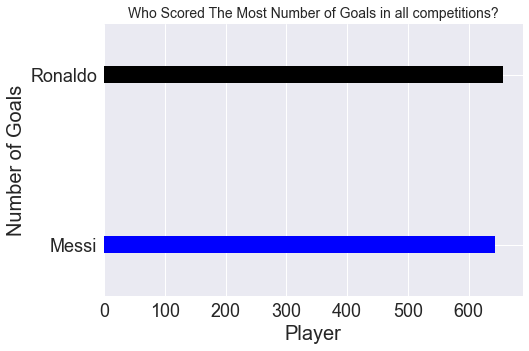

In [284]:
df_clean.groupby(['player'])['player'].count().plot(kind='barh',figsize=(7.5,5),width=0.1,color=['b','black'])
plt.xlabel('Player')
plt.ylabel('Number of Goals')
plt.title('Who Scored The Most Number of Goals in all competitions?',fontsize=14)
plt.show()

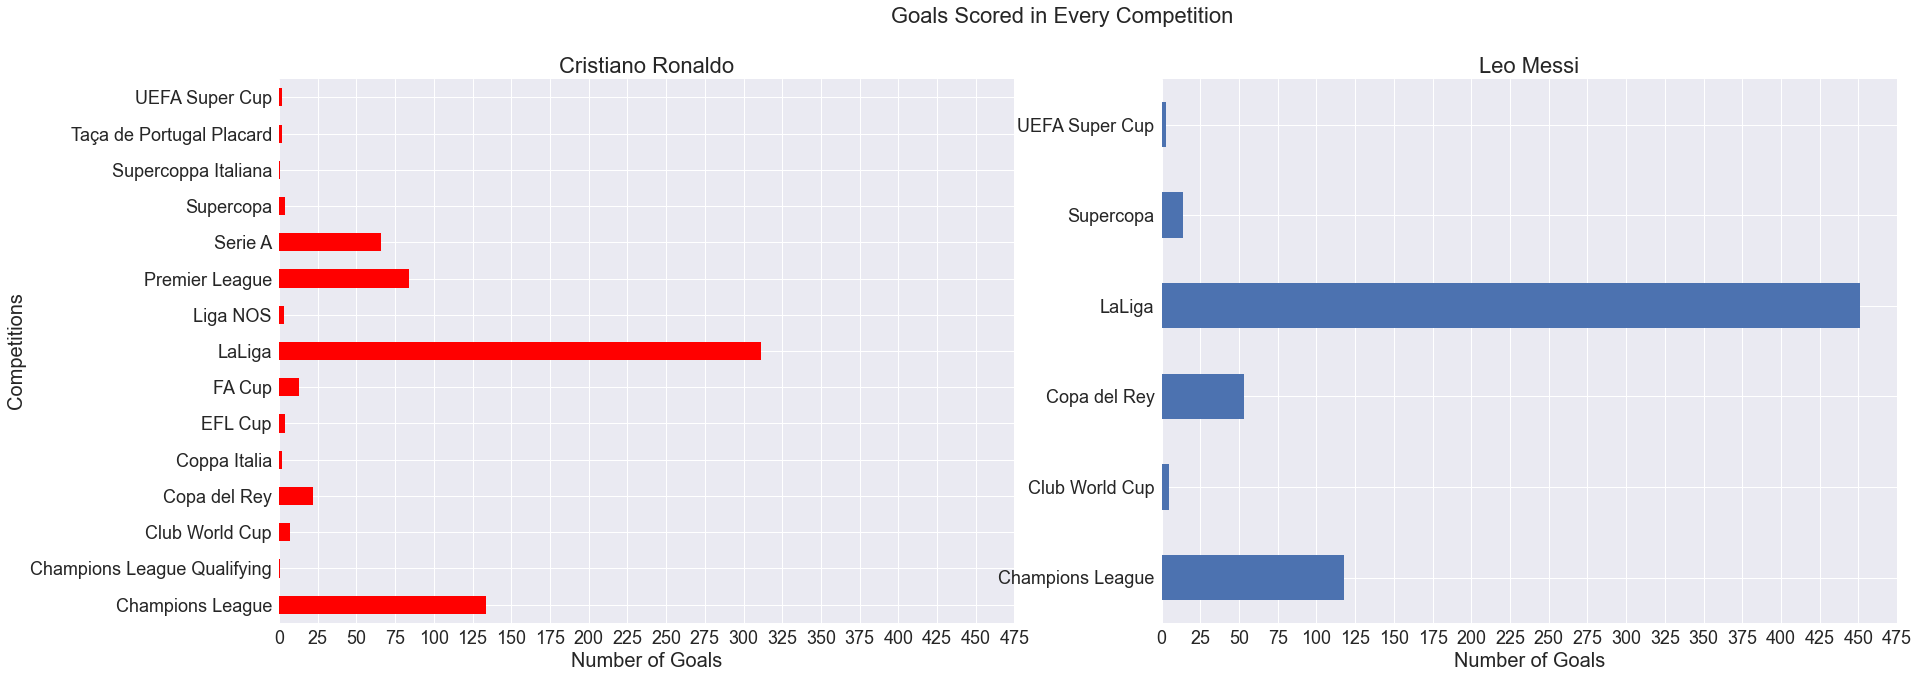

In [285]:
plt.subplot(1,2,1)
df_clean.loc[df_clean.player=='Ronaldo'].groupby(['comp'])['comp'].count().plot(kind='barh',figsize = (29,10),color='r')
plt.title('Cristiano Ronaldo')
plt.xlabel('Number of Goals')
plt.ylabel('Competitions')
plt.xlim(0,475)
plt.xticks(np.arange(0,500,25))
plt.subplot(1,2,2)
df_clean.loc[df_clean.player=='Messi'].groupby(['comp'])['comp'].count().plot(kind='barh')
plt.title('Leo Messi')
plt.xlabel('Number of Goals')
plt.ylabel(' ')
plt.suptitle('Goals Scored in Every Competition')
plt.xlim(0,475)
plt.xticks(np.arange(0,500,25))
plt.show()

> **Result**</font>

 *  Ronaldo scored **656 goals in 15 different competitions against 117 different teams**. This large number of competitions can be explained by the fact that he played in **4 different teams in 4 different countries**:

    1 . Sporting Lisbon - Portugal (2002-2003)

    2 . Manchester United - England (2003-2009)

    3 . Real Madrid - Spain (2009-2018)

    4 . Juventus FC. - Italy (2018 - ....)

* Messi scored **644 goals in 6 different competitions against 80 different teams** as he only played for **FC Barcelona** since he started playing :

    1 . FC Barcelona - Spain (2005-2021)
    

 *  **Messi**'s superiority in **La Liga** by a large margin over Ronaldo **(451 goals for Messi versus 311 for Ronaldo)** can be explained by the number of years Messi spent compared to Ronaldo **(16 years: from 2005 to 2021 for Messi, compared to only 9 years for Ronaldo: from 2009 to 2018)**.



<center><img src="https://as01.epimg.net/en/imagenes/2019/09/26/football/1569533790_809013_noticia_normal.jpg"/>




## <font color='red'> **Research Question 2: What Are The "Goals Per Year" Stats For Every Player in All Competitions?**</font>


> * **Cristiano Ronaldo Stats**

In [286]:
df_clean.loc[df_clean.player == 'Ronaldo'].groupby(['Year'])['player'].count()

Year
2002     5
2003     1
2004     6
2005    13
2006    19
2007    29
2008    34
2009    29
2010    45
2011    53
2012    58
2013    59
2014    56
2015    54
2016    42
2017    42
2018    43
2019    25
2020    41
2021     2
Name: player, dtype: int64

> * **Leo Messi Stats**

In [287]:
df_clean.loc[df_clean.player == 'Messi'].groupby(['Year'])['player'].count()

Year
2005     3
2006    10
2007    25
2008    20
2009    38
2010    58
2011    55
2012    79
2013    39
2014    50
2015    48
2016    51
2017    50
2018    47
2019    45
2020    26
Name: player, dtype: int64

> * **The best year in scoring goals for Ronaldo and Messi**

In [288]:
df_clean.groupby(['player','Year'])['player'].count().nlargest()[0:2]

player   Year
Messi    2012    79
Ronaldo  2013    59
Name: player, dtype: int64

> *  **Stats Visualization**

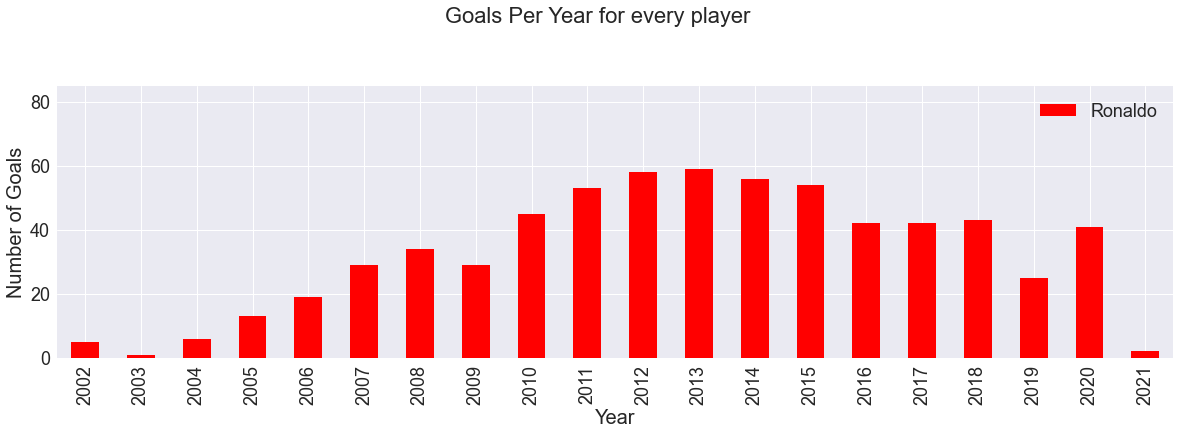

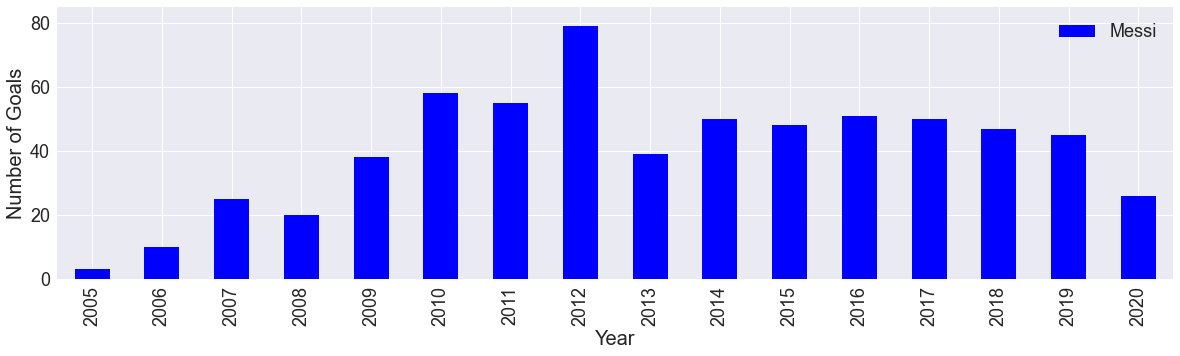

In [289]:
plt.suptitle('Goals Per Year for every player')
plt.subplot(2,1,1)
df_clean.loc[df_clean.player=='Ronaldo'].groupby(['Year'])['date'].count().astype(int).plot(kind='bar',color='red',label='Ronaldo',figsize=(20,11))
plt.ylim(0,85)
plt.ylabel('Number of Goals')
#plt.ticklabel_format(useOffset=False, style='plain') 
plt.legend()
plt.show()
plt.subplot(2,1,2)
df_clean.loc[df_clean.player=='Messi'].groupby(['Year'])['date'].count().astype(int).plot(kind='bar',color='b',label='Messi',figsize=(20,11))
plt.legend()
plt.ylim(0,85)
plt.ylabel('Number of Goals')
plt.show()

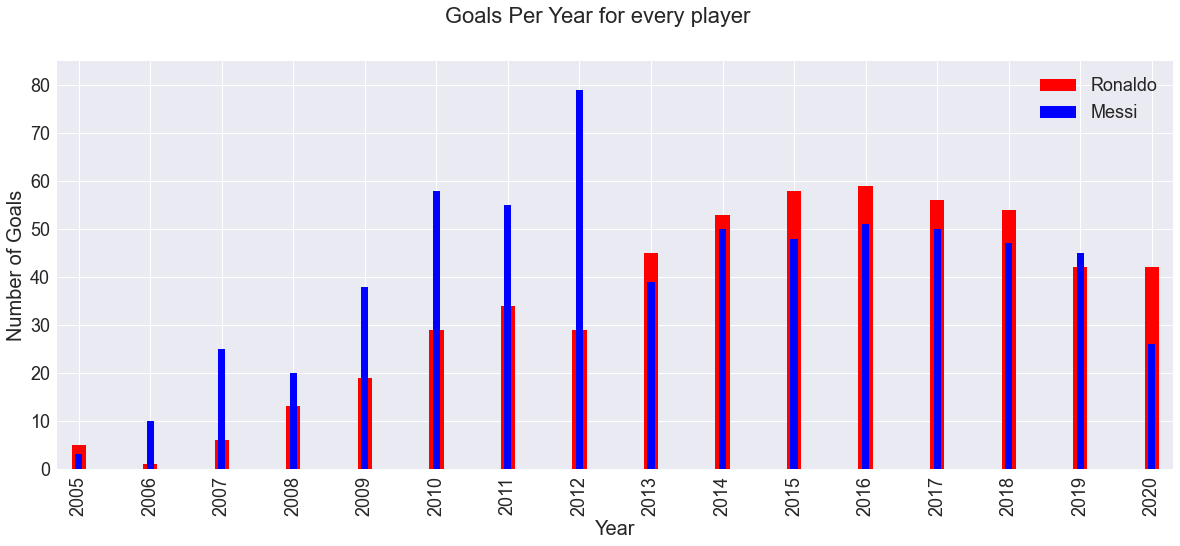

In [290]:
plt.suptitle('Goals Per Year for every player')
df_clean.loc[df_clean.player=='Ronaldo'].groupby(['Year'])['date'].count().astype(int).plot(kind='bar',color='red',label='Ronaldo',figsize=(20,7.5),width = 0.2)
df_clean.loc[df_clean.player=='Messi'].groupby(['Year'])['date'].count().astype(int).plot(kind='bar',color='b',label='Messi',figsize=(20,7.5),width=0.1)
plt.ylim(0,85)
plt.legend()
plt.ylabel('Number of Goals')
plt.show()

> **Result**

 * **Ronaldo's** best year **at the top of his level** equals only **75% of Messi's goals** at the top of his level **(79 goals in 2012 for Messi compared to 59 for Ronaldo in 2013)**


 *  In the period from **2006 to 2012**, the preference was very clear to **Messi**, by a very large difference from Ronaldo until **Messi reached the top of his level in 2012**, after which **Ronaldo began to excel and the level of Messi declined** compared to previous seasons until **Ronaldo left Real Madrid in 2018**, so **Messi regained his brilliance in the year 2019** before **Ronaldo pulls the rug out from under him the following year 2020 .**


 * It is also noted in the comparison between the players' charts that **Messi presented his best levels in the period between 2006 and 2012**, and then **his level decreased in 2013 shockingly**, while the situation was the opposite for Ronaldo, where **the rate of his goals gradually increased year after year, so that the decrease in his level was predictable not as it was The case for Messi .**


<center><img src="https://s.france24.com/media/display/451ed2b8-eed6-11ea-afdd-005056bf87d6/messi-1805.jpg"/></center>

## <font color='red'>**Research Question 3: What is the most preferred types for every player to score a goal?**</font>


> * **How many different types did Cristiano Ronaldo score goals with?**

In [291]:
df_clean[(df_clean.player=='Ronaldo')]['type'].nunique()

12

> * **How many different types did Leo Messi score goals with?**

In [292]:
df_clean[(df_clean.player=='Messi')]['type'].nunique()

11

> * **Ronaldo VS Messi (Goal Type)**

In [293]:
df_clean.groupby(['type','player'])['venue'].count()

type                    player 
Chest                   Messi        1
                        Ronaldo      0
Counter attack goal     Messi        0
                        Ronaldo      3
Deflected shot on goal  Messi        2
                        Ronaldo      2
Direct free kick        Messi       47
                        Ronaldo     46
Header                  Messi       23
                        Ronaldo    103
Left-footed shot        Messi      394
                        Ronaldo    102
Long distance kick      Messi        0
                        Ronaldo      9
Penalty                 Messi       80
                        Ronaldo    122
Penalty rebound         Messi        3
                        Ronaldo      2
Right-footed shot       Messi       80
                        Ronaldo    235
Solo                    Messi        1
                        Ronaldo     18
Solo run                Messi        4
                        Ronaldo      1
Tap-in                  Messi   

> * **Stats Visualization**

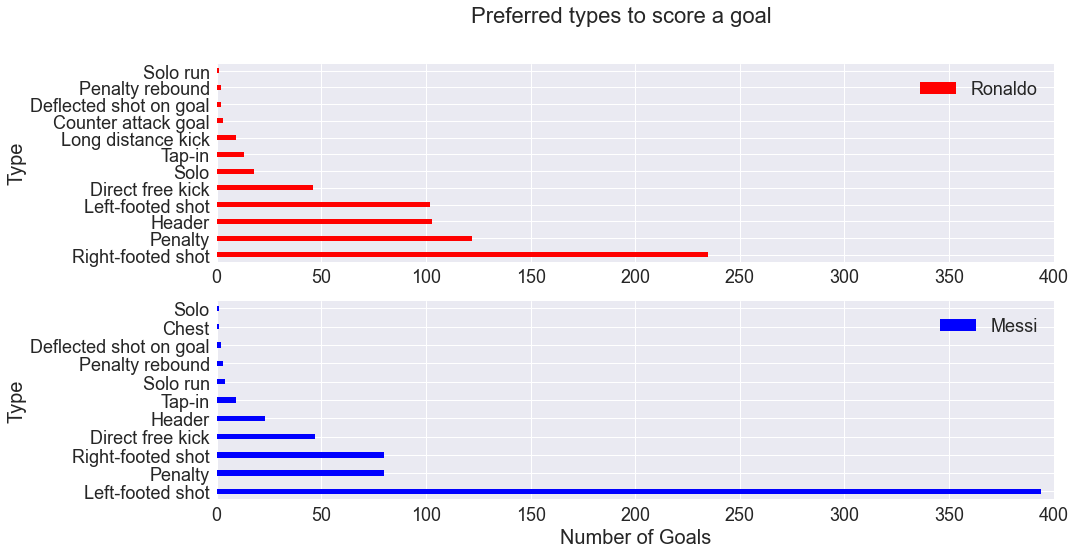

In [294]:
plt.subplot(2,1,1)
df_clean.loc[df_clean.player == 'Ronaldo'].groupby(['type'])['venue'].count().nlargest(12).plot(kind='barh',width = 0.3,label='Ronaldo',color='r',figsize=(15,8))
plt.xlim(0,400)
plt.ylabel('Type')
plt.legend()
plt.subplot(2,1,2)
df_clean.loc[df_clean.player == 'Messi'].groupby(['type'])['venue'].count().nlargest(12).plot(kind='barh',width = 0.3,label='Messi',color='blue')
plt.xlim(0,400)
plt.ylabel('Type')
plt.xlabel('Number of Goals')
plt.legend()
plt.suptitle('Preferred types to score a goal')
plt.show()

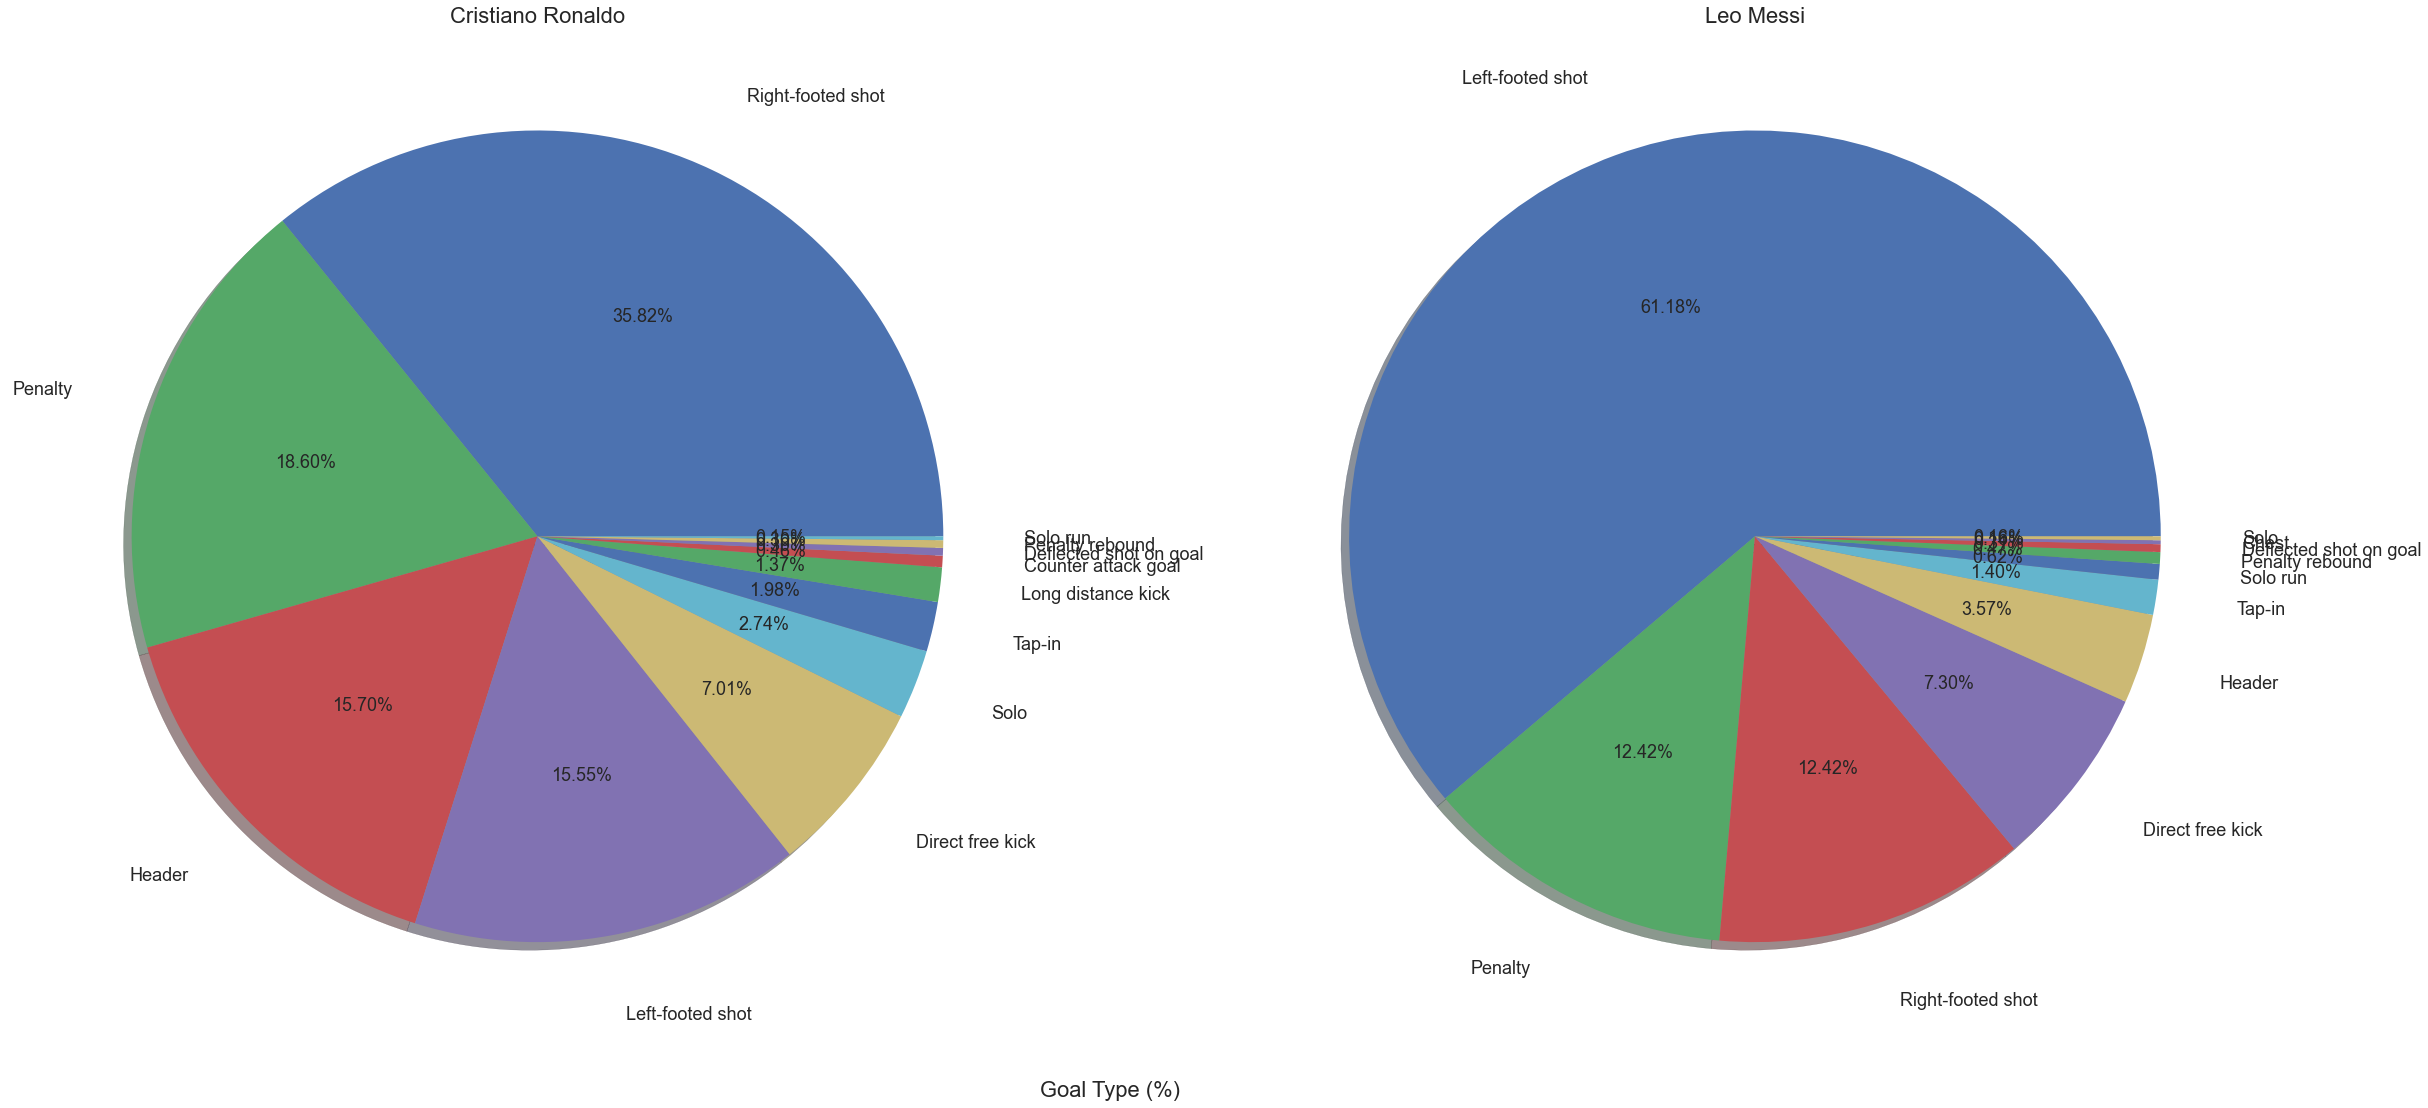

In [295]:
plt.subplot(1,2,1)
df_clean.loc[df_clean.player == 'Ronaldo'].groupby(['type'])['venue'].count().nlargest(50).plot(kind='pie',shadow=True,autopct='%.2f%%',figsize=(40,25),labeldistance=1.2)
plt.ylabel(' ')
plt.title('Cristiano Ronaldo')
plt.subplot(1,2,2)
df_clean.loc[df_clean.player == 'Messi'].groupby(['type'])['venue'].count().nlargest(50).plot(kind='pie',shadow=True,autopct='%.2f%%',figsize=(40,25),labeldistance=1.2)
plt.ylabel(' ')
plt.title('Leo Messi')
plt.suptitle('Goal Type (%)',y=.2)
plt.show()

> **Result**

 * **Messi's** favorite way to score goals is to **shoot with the left foot**, as he scored about **60% of his total goals (394 goals)**


* **Messi is relatively better** than Ronaldo **in scoring free kicks** by only one goal **(47 goals for Messi compared to 46 for Ronaldo)**, as well as in **goals that require special skill and dribbling more than one player** **(4 goals for Messi against a single scorer for Ronaldo)**


<center><img src="https://cdn.cnn.com/cnnnext/dam/assets/150308165118-messi-vallecano-super-169.jpg"/></center>

* **Ronaldo's** favorite way to score is to **shoot with the right foot**, but despite that he is good at shooting with the left foot **(235 goals with the right foot compared to 102 goals with the left foot)**, and **this represents an advantage when compared to Messi**, whose **right foot is very weak** compared to the left **(394 goals with the left foot compared to 80 goals for the right foot only)**


 *  **superiority of Ronaldo** in the **counter-attack goals** (3 goals against zero for Messi) and **shots from long distances** (9 goals against zero for Messi), **taking advantage of his awesome speed and the power of his shots**


<center><img src="https://acefootball.com/wp-content/uploads/2020/07/GettyImages-1153924878.jpg"/></center>

 * **Ronaldo clearly excels in headers**, which constitutes **4.5 times** that Messi scored with his head **(103 goals for Ronaldo compared to 23 goals for Messi)**, as well as in **scoring penalty kicks** **(122 goals against 80 goals for Messi)**.</font>


* **Ronaldo** is also superior in **Solo goals** **(18 goals for Ronaldo against only one goal for Messi)** and **Tap-in goals** **(13 goals for Ronaldo against 9 goals for Messi)** with the advantage of his good positioning in the penalty area and waiting for passes from his teammates


## <font color='red'>**Research Question 4: Who Scored more goals in UEFA Champions League Stages?**</font>


> * **UEFA Champions League Group Stage**

In [296]:
df_clean.loc[(df_clean['comp']=='Champions League') & (df_clean['round'] == 'Group Stage')].groupby(['player','comp'])['date'].count()

player   comp            
Messi    Champions League    71
Ronaldo  Champions League    67
Name: date, dtype: int64

> * **UEFA Champions League Knockout Stage**

In [297]:
df_clean.loc[(df_clean['comp']=='Champions League') & (df_clean['round'] != 'Group Stage')].groupby(['player','comp'])['date'].count()

player   comp            
Messi    Champions League    47
Ronaldo  Champions League    67
Name: date, dtype: int64

> * **Stats Visualization**

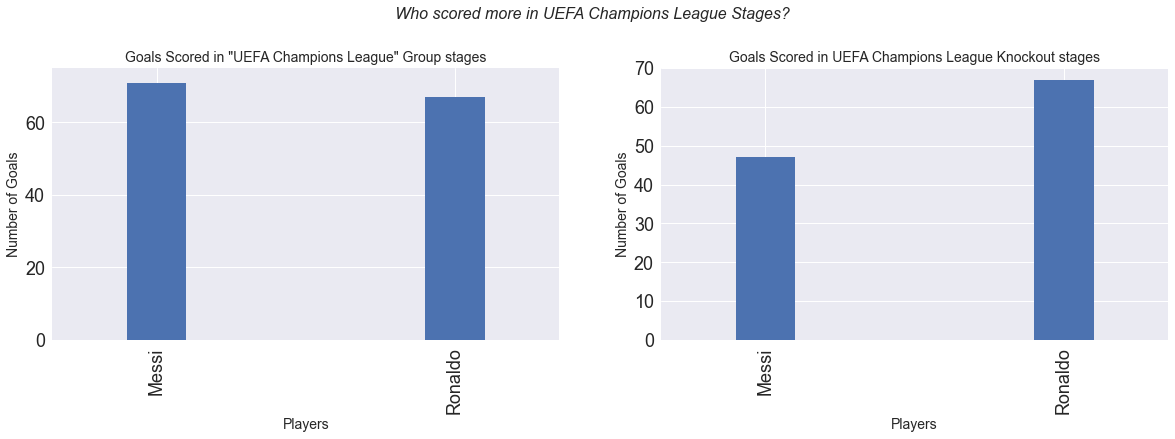

In [298]:
plt.subplot(1,2,1)
df_clean.loc[(df_clean['comp']=='Champions League') & (df_clean['round'] == 'Group Stage')].groupby(['player'])['date'].count().plot(kind='bar',width = 0.2)
plt.title('Goals Scored in "UEFA Champions League" Group stages',fontsize = 14)
plt.xlabel('Players',fontsize = 14)
plt.ylabel('Number of Goals',fontsize = 14)
plt.ylim(0,75)
plt.subplot(1,2,2)
df_clean.loc[(df_clean['comp']=='Champions League') & (df_clean['round'] != 'Group Stage')].groupby(['player'])['date'].count().plot(kind='bar',figsize=(20,5),width = 0.2)
plt.title('Goals Scored in UEFA Champions League Knockout stages',fontsize=14)
plt.xlabel('Players',fontsize = 14)
plt.ylabel('Number of Goals',fontsize = 14)
plt.ylim(0,70)
plt.suptitle('Who scored more in UEFA Champions League Stages?',fontsize=16,style ='italic',y=1.05)
plt.show()

> **Result**</font>

 * **Ronaldo** scored more goals in the **knockout stages** than **Messi**, who excelled in the **group stage**, but despite that **the advantage remains for Ronaldo**, as he is **"the king of the Champions Nights"**


<center><img src="https://wallpapercave.com/wp/wp4380951.jpg"/></center>

## <font color='red'> **Research Question 5: What is the favourite position to score a goal for every player?**</font>


In [299]:
df_clean.groupby(['player','pos'])['pos'].count()

player   pos
Messi    AM      10
         CF     272
         LW       1
         RW     316
         SS      45
Ronaldo  AM       0
         CF     165
         LW     367
         RW     124
         SS       0
Name: pos, dtype: int64

> * **Stats Visualization**

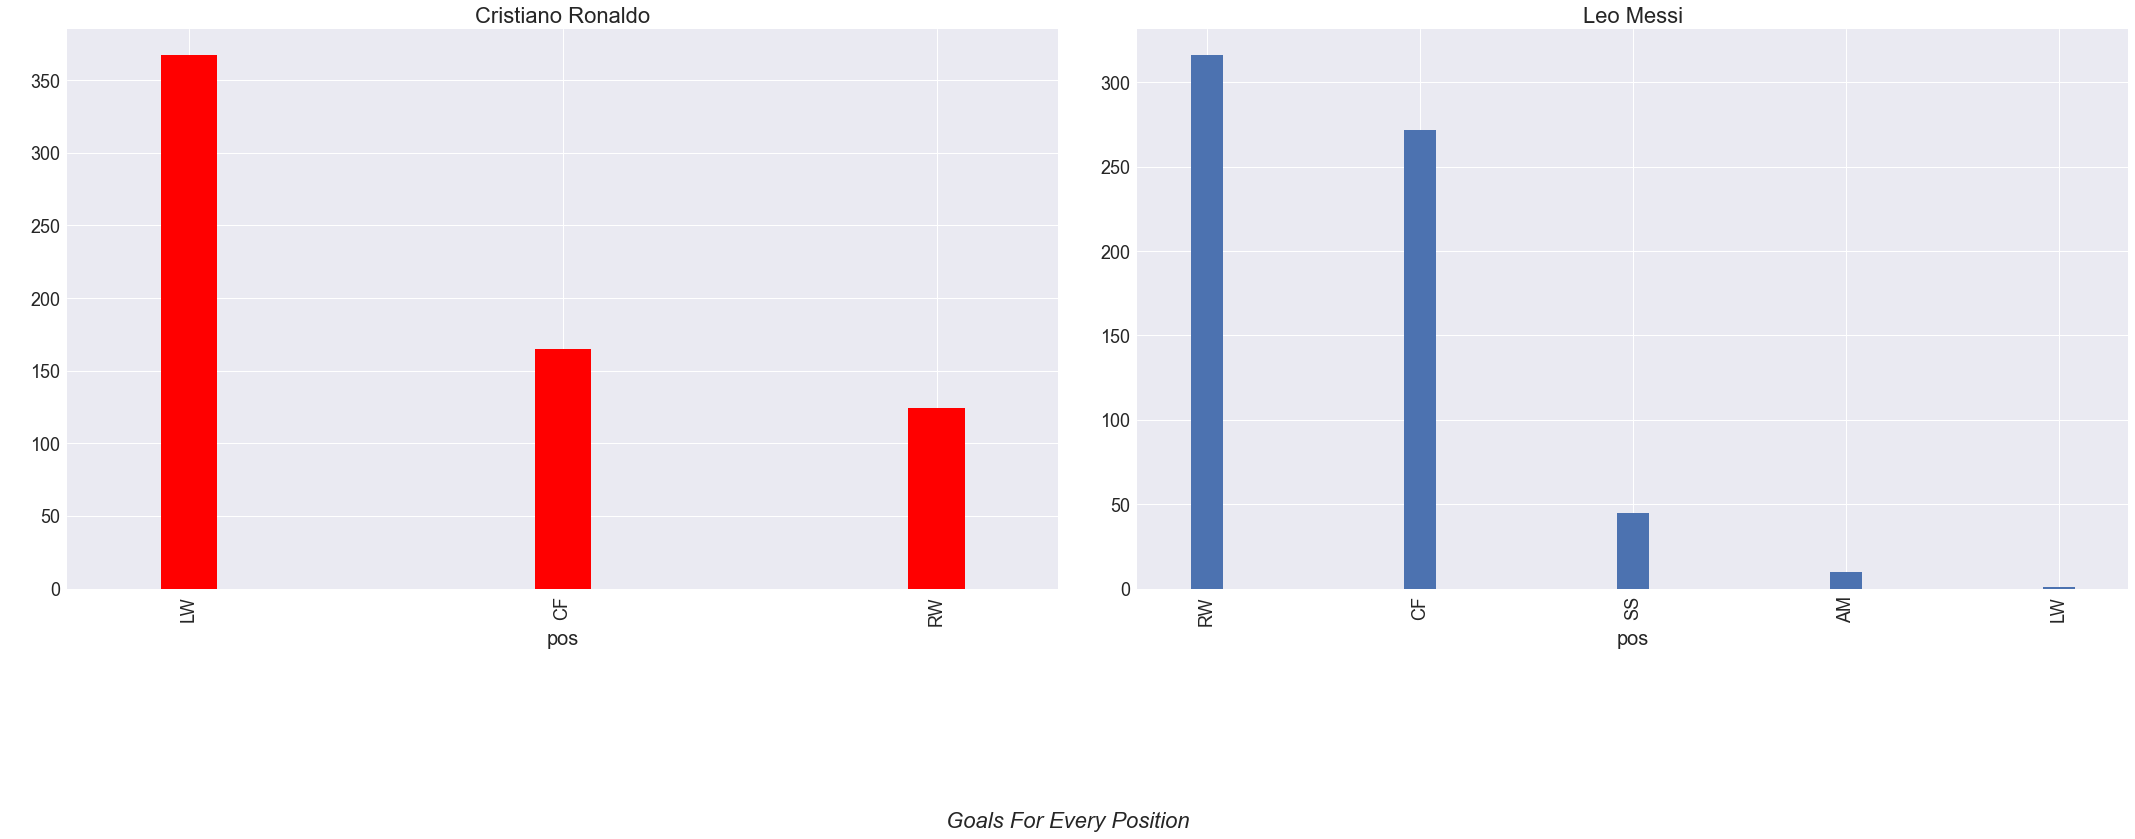

In [300]:
plt.subplot(1, 2, 1)
df_clean.loc[df_clean.player=='Ronaldo'].groupby(['pos'])['pos'].count().nlargest(3).plot(kind='bar',figsize=(30,10),color = 'r',width = 0.15)
plt.title('Cristiano Ronaldo')
plt.ylabel(" ")
plt.subplot(1, 2, 2)
df_clean.loc[df_clean.player=='Messi'].groupby(['pos'])['pos'].count().nlargest().plot(kind='bar',figsize=(30,10),width = 0.15)
plt.title('Leo Messi')
plt.ylabel(" ")
plt.suptitle("Goals For Every Position",style='oblique',y=-0.2)
plt.tight_layout()
plt.show()

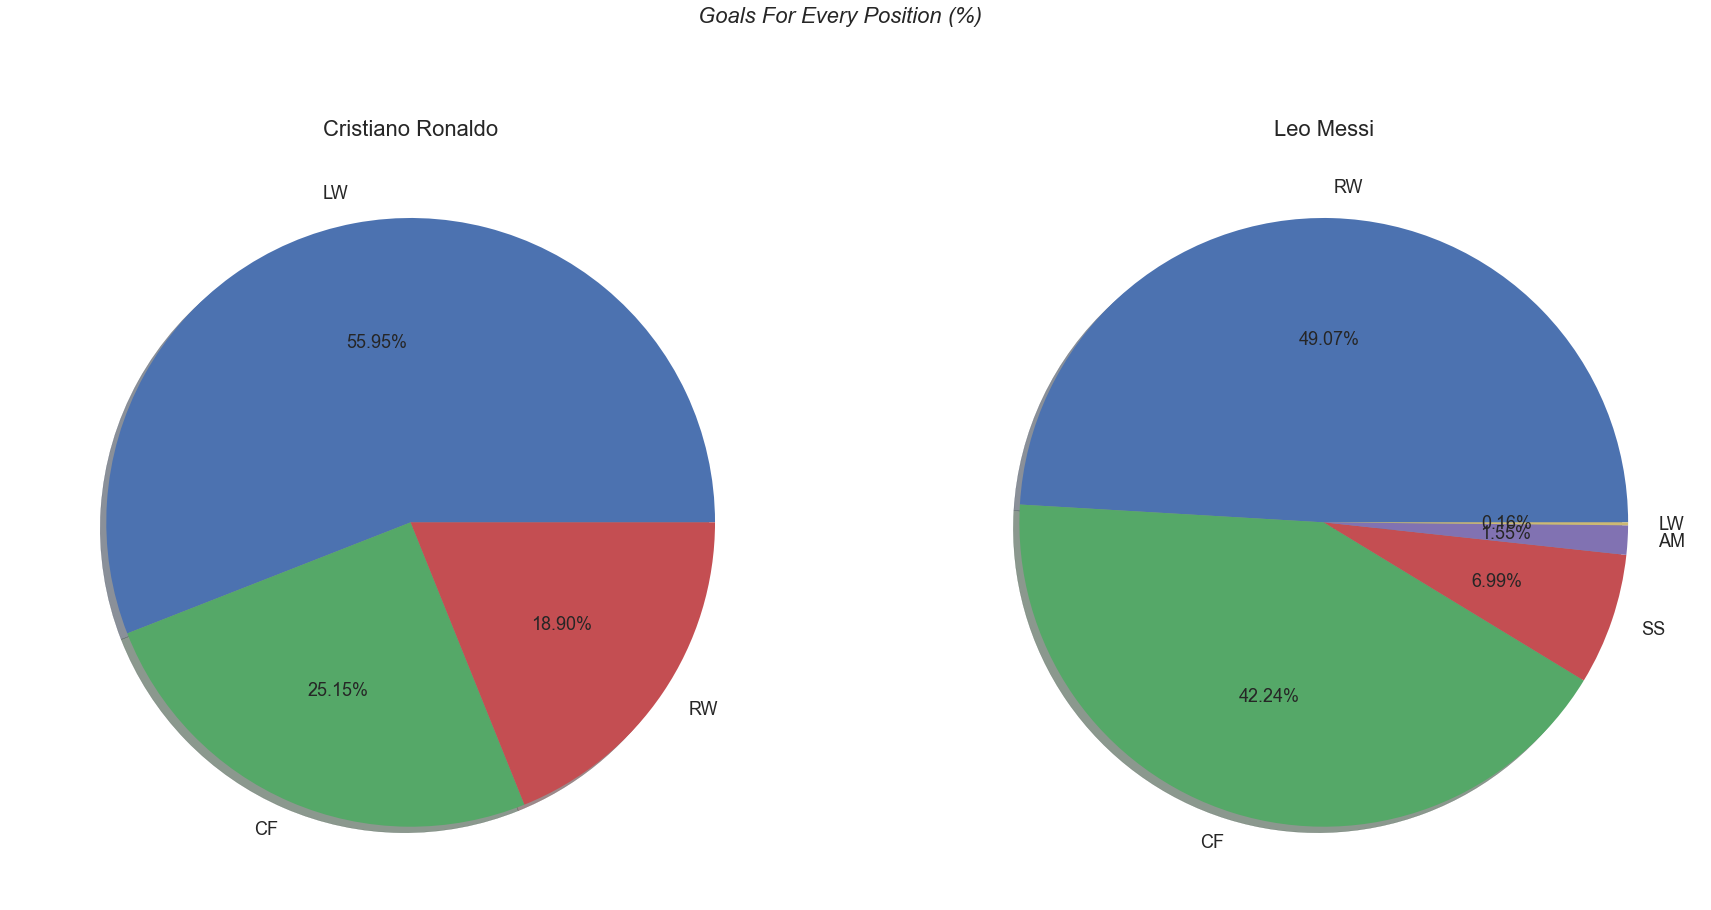

In [301]:
plt.subplot(1, 2, 1)
df_clean.loc[df_clean.player=='Ronaldo'].groupby(['pos'])['pos'].count().nlargest(3).plot(kind='pie',shadow=True,autopct='%.2f%%',figsize=(30,15))
plt.title('Cristiano Ronaldo')
plt.ylabel(" ")
plt.subplot(1, 2, 2)
df_clean.loc[df_clean.player=='Messi'].groupby(['pos'])['pos'].count().nlargest().plot(kind='pie',shadow=True,autopct='%.2f%%',figsize=(30,15))
plt.title('Leo Messi')
plt.ylabel(" ")
plt.suptitle("Goals For Every Position (%)",style='oblique')
plt.show()

> **Result**

* **Ronaldo as a LW** scored **56% of his goals** and **Messi as a RW** scored **50% of his goals**. We notice half of the goals or a little more than half of both Ronaldo and Messi scored in **positions that allow them to shoot with their strong feet**

* Messi played in **5 different positions (RW, CF, SS, AM, and LW)**. He scored about **90% of his goals as a CF and RW**

* Ronaldo only played in **three positions (RW, CF, and LF)**, but he also scored goals when he was placed in a position other than his original position as a RW

## <font color='red'>**Research Question 6: Which teams recieved the most goals from every player in LaLiga and UEFA Champions League?** </font>


>  **LaLiga**

> * **Who scroed more?**

In [302]:
df_clean.loc[df_clean.comp=='LaLiga'].groupby('player')['player'].count()

player
Messi      451
Ronaldo    311
Name: player, dtype: int64

> * **The number of teams with which each player scored goals**

In [303]:
df_clean.loc[(df_clean.player=='Ronaldo') & (df_clean.comp == 'LaLiga')]['opp'].nunique()

32

In [304]:
df_clean.loc[(df_clean.player=='Messi') & (df_clean.comp == 'LaLiga')]['opp'].nunique()

37

> * **Stats Visualization**

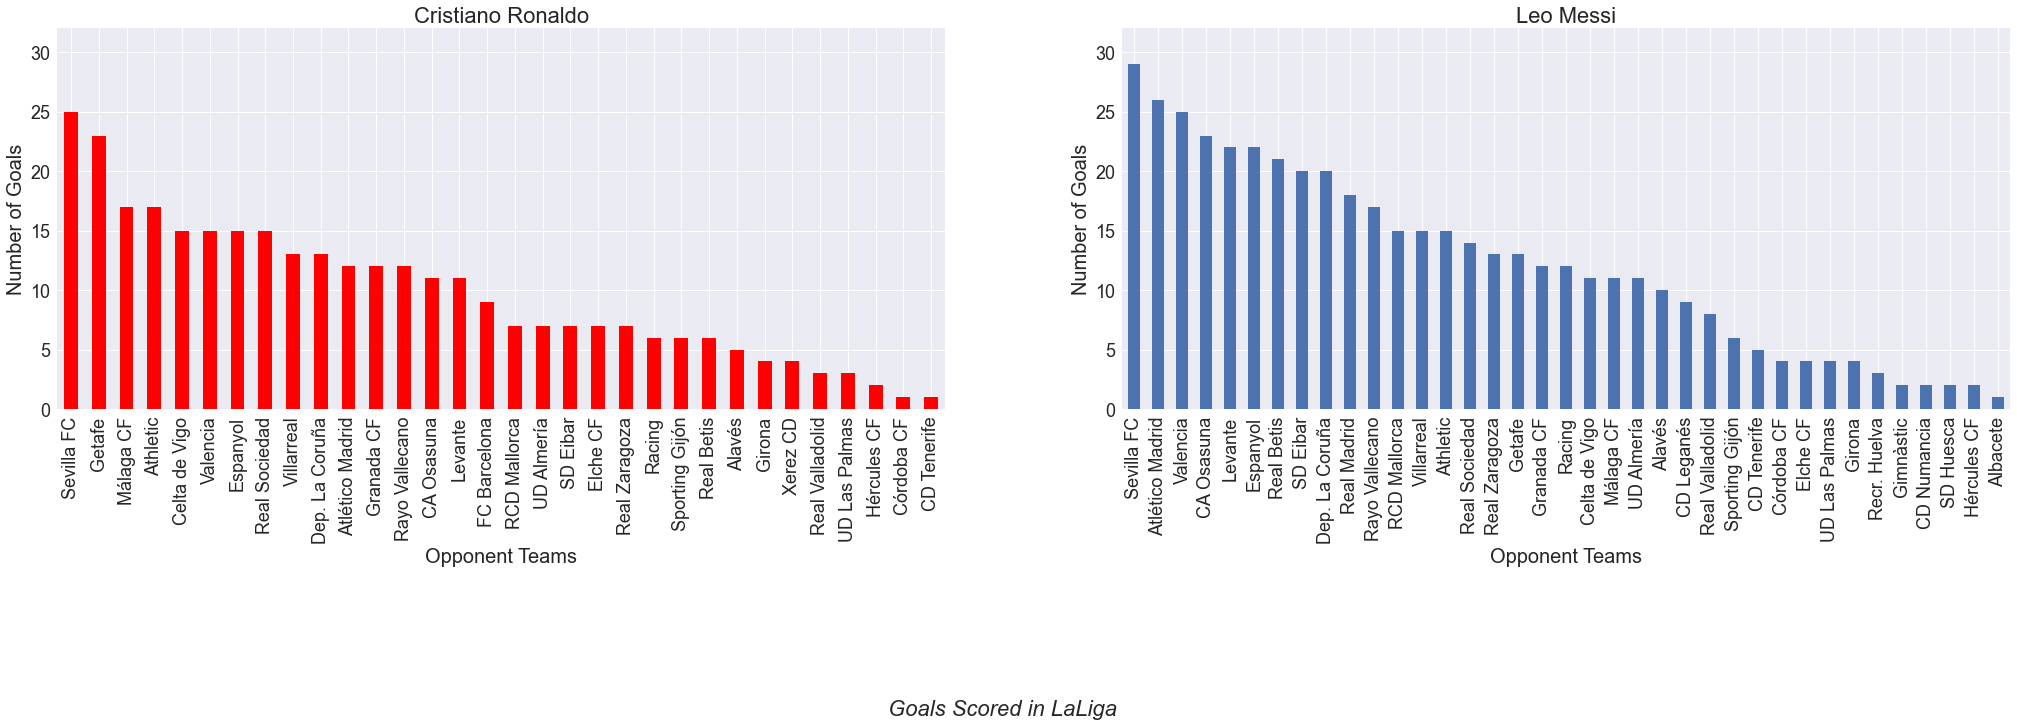

In [305]:
plt.subplot(1,2,1)
df_clean.loc[(df_clean.player=='Ronaldo') & (df_clean.comp=='LaLiga')].groupby(['opp'])['opp'].count().nlargest(50).plot(kind='bar',figsize=(35,7),color='r')
plt.title('Cristiano Ronaldo')
plt.xlabel('Opponent Teams')
plt.ylabel('Number of Goals')
plt.ylim(0,32)
plt.subplot(1,2,2)
df_clean.loc[(df_clean.player=='Messi') & (df_clean.comp=='LaLiga')].groupby(['opp'])['opp'].count().nlargest(50).plot(kind='bar')
plt.title('Leo Messi')
plt.xlabel('Opponent Teams')
plt.ylabel('Number of Goals')
plt.ylim(0,32)
plt.suptitle('Goals Scored in LaLiga',style='italic',y=-0.45)
plt.show()

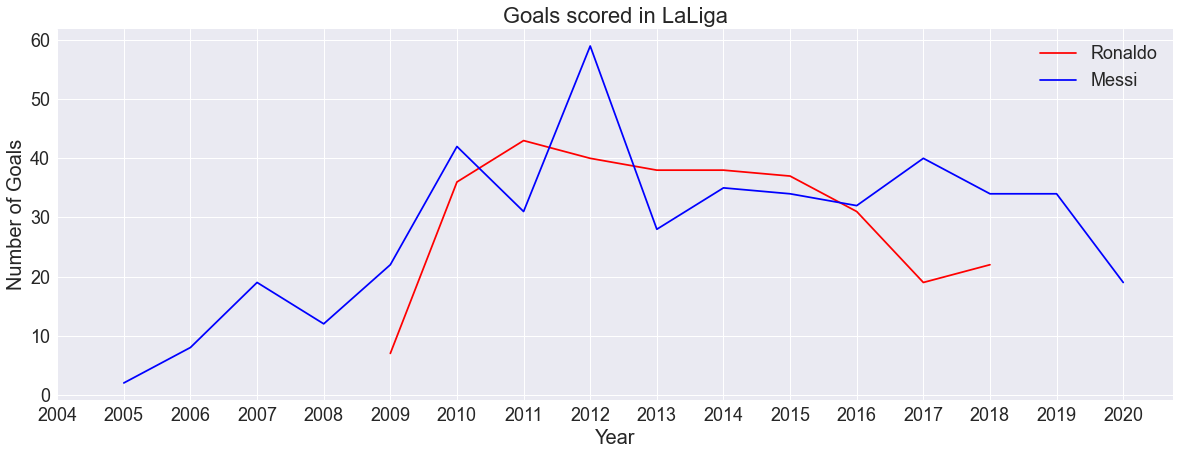

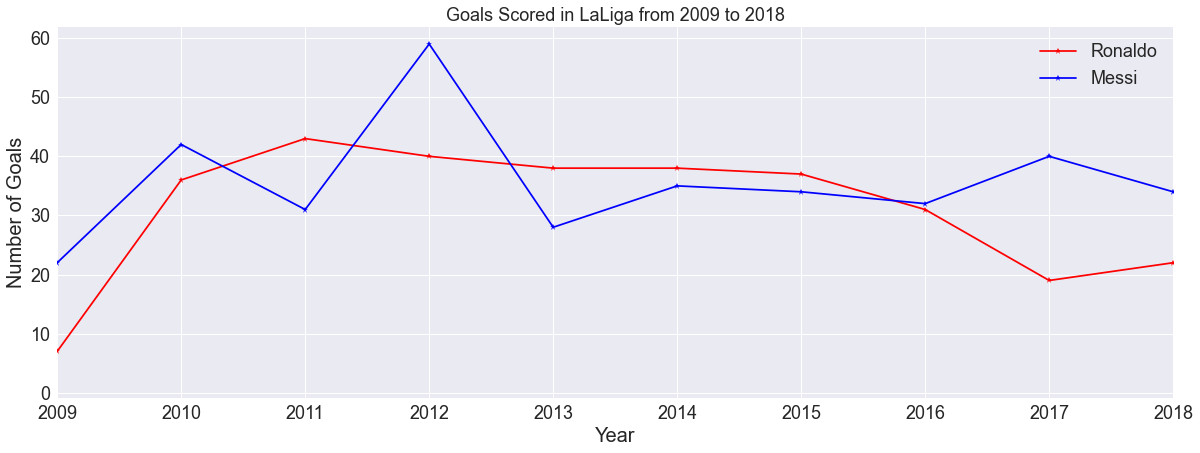

In [306]:
plt.subplot(2,1,1)
df_clean.loc[(df_clean.player=='Ronaldo') & (df_clean.comp=='LaLiga')].groupby(['Year'])['player'].count().plot(kind='line',color = 'red',label='Ronaldo',figsize=(20,15))
df_clean.loc[(df_clean.player=='Messi') & (df_clean.comp=='LaLiga')].groupby(['Year'])['player'].count().plot(kind='line',color = 'blue',label='Messi')
plt.ticklabel_format(useOffset=False, style='plain') 
plt.title('Goals scored in LaLiga')
plt.ylabel('Number of Goals')
plt.xticks(np.arange(2004,2021,1))
plt.legend()
plt.show()
plt.subplot(2,1,2)
df_clean.loc[(df_clean.player=='Ronaldo') & (df_clean.comp=='LaLiga')].groupby(['Year'])['player'].count().plot(kind='line',color = 'red',label='Ronaldo',marker='*',figsize=(20,15))
df_clean.loc[(df_clean.player=='Messi') & (df_clean.comp=='LaLiga')].groupby(['Year'])['player'].count().plot(kind='line',color = 'blue',label='Messi',marker='*')
plt.ticklabel_format(useOffset=False, style='plain') 
plt.xlim(2009,2018)
plt.xticks(np.arange(2009,2019,1))
plt.ylabel('Number of Goals')
plt.title('Goals Scored in LaLiga from 2009 to 2018',fontsize=18)
plt.legend()
plt.show()

> **Result**

* In La Liga, **Messi** scored **451 goals** against **37 different teams**, while **Ronaldo** scored **311 goals** against **32 different teams**

* Ronaldo and Messi have scored **the most goals** in La Liga **against the same team, " Sevilla F.C. "** **(25 goals for Ronaldo, 29 goals for Messi)**

* In the period from 2009 to 2018, the preference was for **Messi in 6 seasons (2009 - 2010 - 2012 - 2016 - 2017 - 2018)** compared to **only 3 seasons for Ronaldo (2011 - 2014 - 2015)**.

<center><img src="https://cdn.standardmedia.co.ke/images/sunday/lijah1dklu6ej5cc4c42f93154.webp"/></center>

> **UEFA Champions League**

> * **Who scored more?**

In [307]:
df_clean.loc[df_clean.comp=='Champions League'].groupby('player')['player'].count()

player
Messi      118
Ronaldo    134
Name: player, dtype: int64

> * **The number of teams with which each player scored goals** 

In [308]:
df_clean.loc[(df_clean.player=='Ronaldo') & (df_clean.comp == 'Champions League')]['opp'].nunique()

35

In [309]:
df_clean.loc[(df_clean.player=='Messi') & (df_clean.comp == 'Champions League')]['opp'].nunique()

36

> * **Teams recieved the most goals in UEFA Champions League**

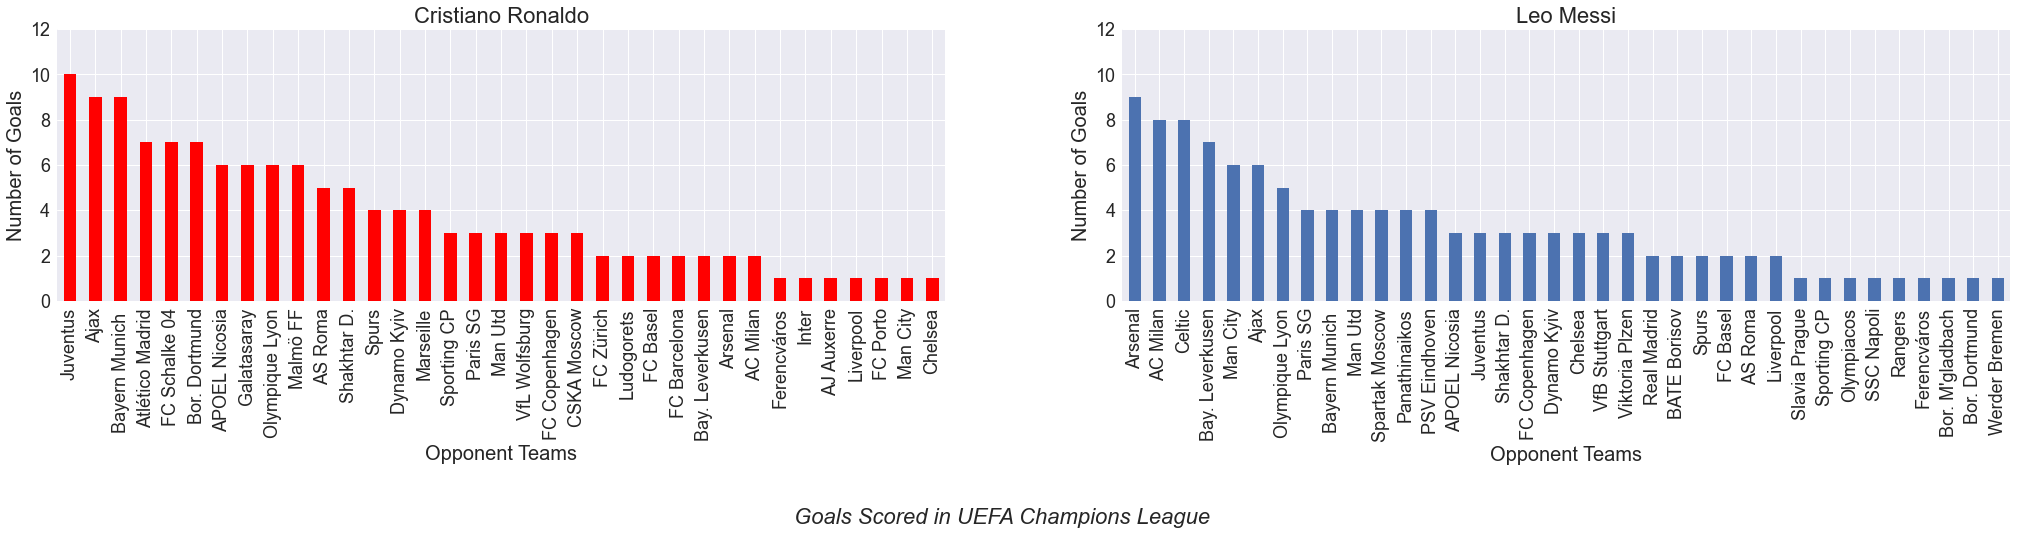

In [310]:
plt.subplot(1,2,1)
df_clean.loc[(df_clean.player=='Ronaldo') & (df_clean.comp=='Champions League')].groupby(['opp'])['opp'].count().nlargest(50).plot(kind='bar',figsize=(35,5),color='r')
plt.title('Cristiano Ronaldo')
plt.xlabel('Opponent Teams')
plt.ylabel('Number of Goals')
plt.ylim(0,12)
plt.subplot(1,2,2)
df_clean.loc[(df_clean.player=='Messi') & (df_clean.comp=='Champions League')].groupby(['opp'])['opp'].count().nlargest(50).plot(kind='bar')
plt.title('Leo Messi')
plt.xlabel('Opponent Teams')
plt.ylabel('Number of Goals')
plt.ylim(0,12)
plt.suptitle('Goals Scored in UEFA Champions League',style='italic',y=-0.45)
plt.show()


> * **Stats Visualization**

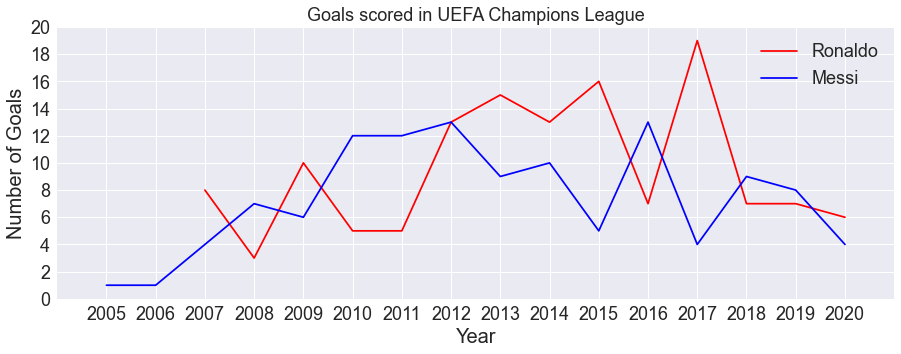

In [311]:
df_clean.loc[(df_clean.player=='Ronaldo') & (df_clean.comp=='Champions League')].groupby(['Year'])['player'].count().plot(kind='line',color = 'red',label='Ronaldo')
df_clean.loc[(df_clean.player=='Messi') & (df_clean.comp=='Champions League')].groupby(['Year'])['player'].count().plot(kind='line',color = 'blue',label='Messi')
plt.ticklabel_format(useOffset=False, style='plain') 
plt.xlim(2004,2021)
plt.xticks(np.arange(2005,2021,1))
plt.title('Goals scored in UEFA Champions League',fontsize = 18)
plt.ylabel('Number of Goals')
plt.yticks(np.arange(0,22,2))
plt.legend()
plt.show()

**Result**

*  In UEFA Champions League, **Messi** scored **118 goals** against **36 different teams**, while **Ronaldo** scored **134 goals** against **35 different teams**

* The team that received the most goals from **Ronaldo** was **" Juventus "**, with **10 goals**, and on the other hand, for **Messi**, it was **" Arsenal "** with **9 goals**

<center><img src="https://neoprimesport.com/wp-content/uploads/2018/08/ZCVBBB.jpg"/></center>

<center><img src="https://images2.minutemediacdn.com/image/fetch/w_736,h_485,c_fill,g_auto,f_auto/https%3A%2F%2Feverythingbarca.com%2Fwp-content%2Fuploads%2Fgetty-images%2F2018%2F08%2F516532448-850x560.jpeg"/></center>

## <font color='red'> **Research Question 7: When did the players score the most of their goals over the course of the match?**</font>


In [312]:
df_clean.groupby(['player','match period'])['match period'].count()

player   match period               
Messi    First Half                     276
         First Half-Additional Time       5
         Second Half                    336
         Second Half-Additional Time     26
         Xtra-Time                        1
Ronaldo  First Half                     284
         First Half-Additional Time       4
         Second Half                    345
         Second Half-Additional Time     17
         Xtra-Time                        6
Name: match period, dtype: int64

> * **Stats Visualization**

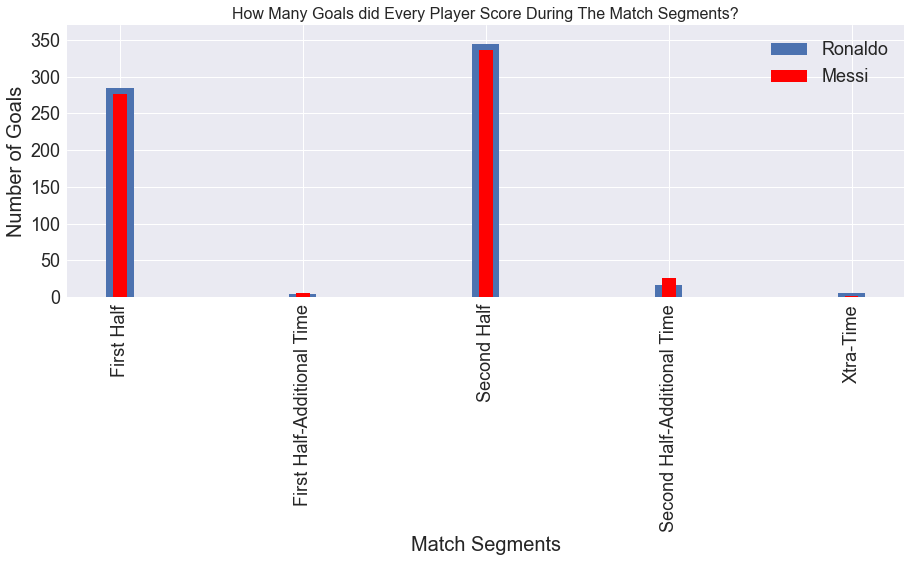

In [313]:
df_clean.loc[df_clean.player=='Ronaldo'].groupby(['match period'])['match period'].count().plot(kind='bar',width=0.15,label='Ronaldo')
df_clean.loc[df_clean.player=='Messi'].groupby(['match period'])['match period'].count().plot(kind='bar',width=0.075,color='r',label='Messi')
plt.legend()
plt.xlabel('Match Segments')
plt.ylabel('Number of Goals')
plt.title('How Many Goals did Every Player Score During The Match Segments?',fontsize = 16)
plt.yticks(np.arange(0,400,50))
plt.ylim(0,370)
plt.show()

In [314]:
df_clean.loc[df_clean.player=='Ronaldo'].groupby(['min'])['match period'].count().nlargest(10)

min
90    18
23    14
45    14
70    13
76    13
89    13
82    12
26    11
25    10
49    10
Name: match period, dtype: int64

In [315]:
df_clean.loc[df_clean.player=='Messi'].groupby(['min'])['match period'].count().nlargest(10)

min
55    13
45    12
78    12
87    12
63    11
75    11
82    11
86    11
90    11
16    10
Name: match period, dtype: int64

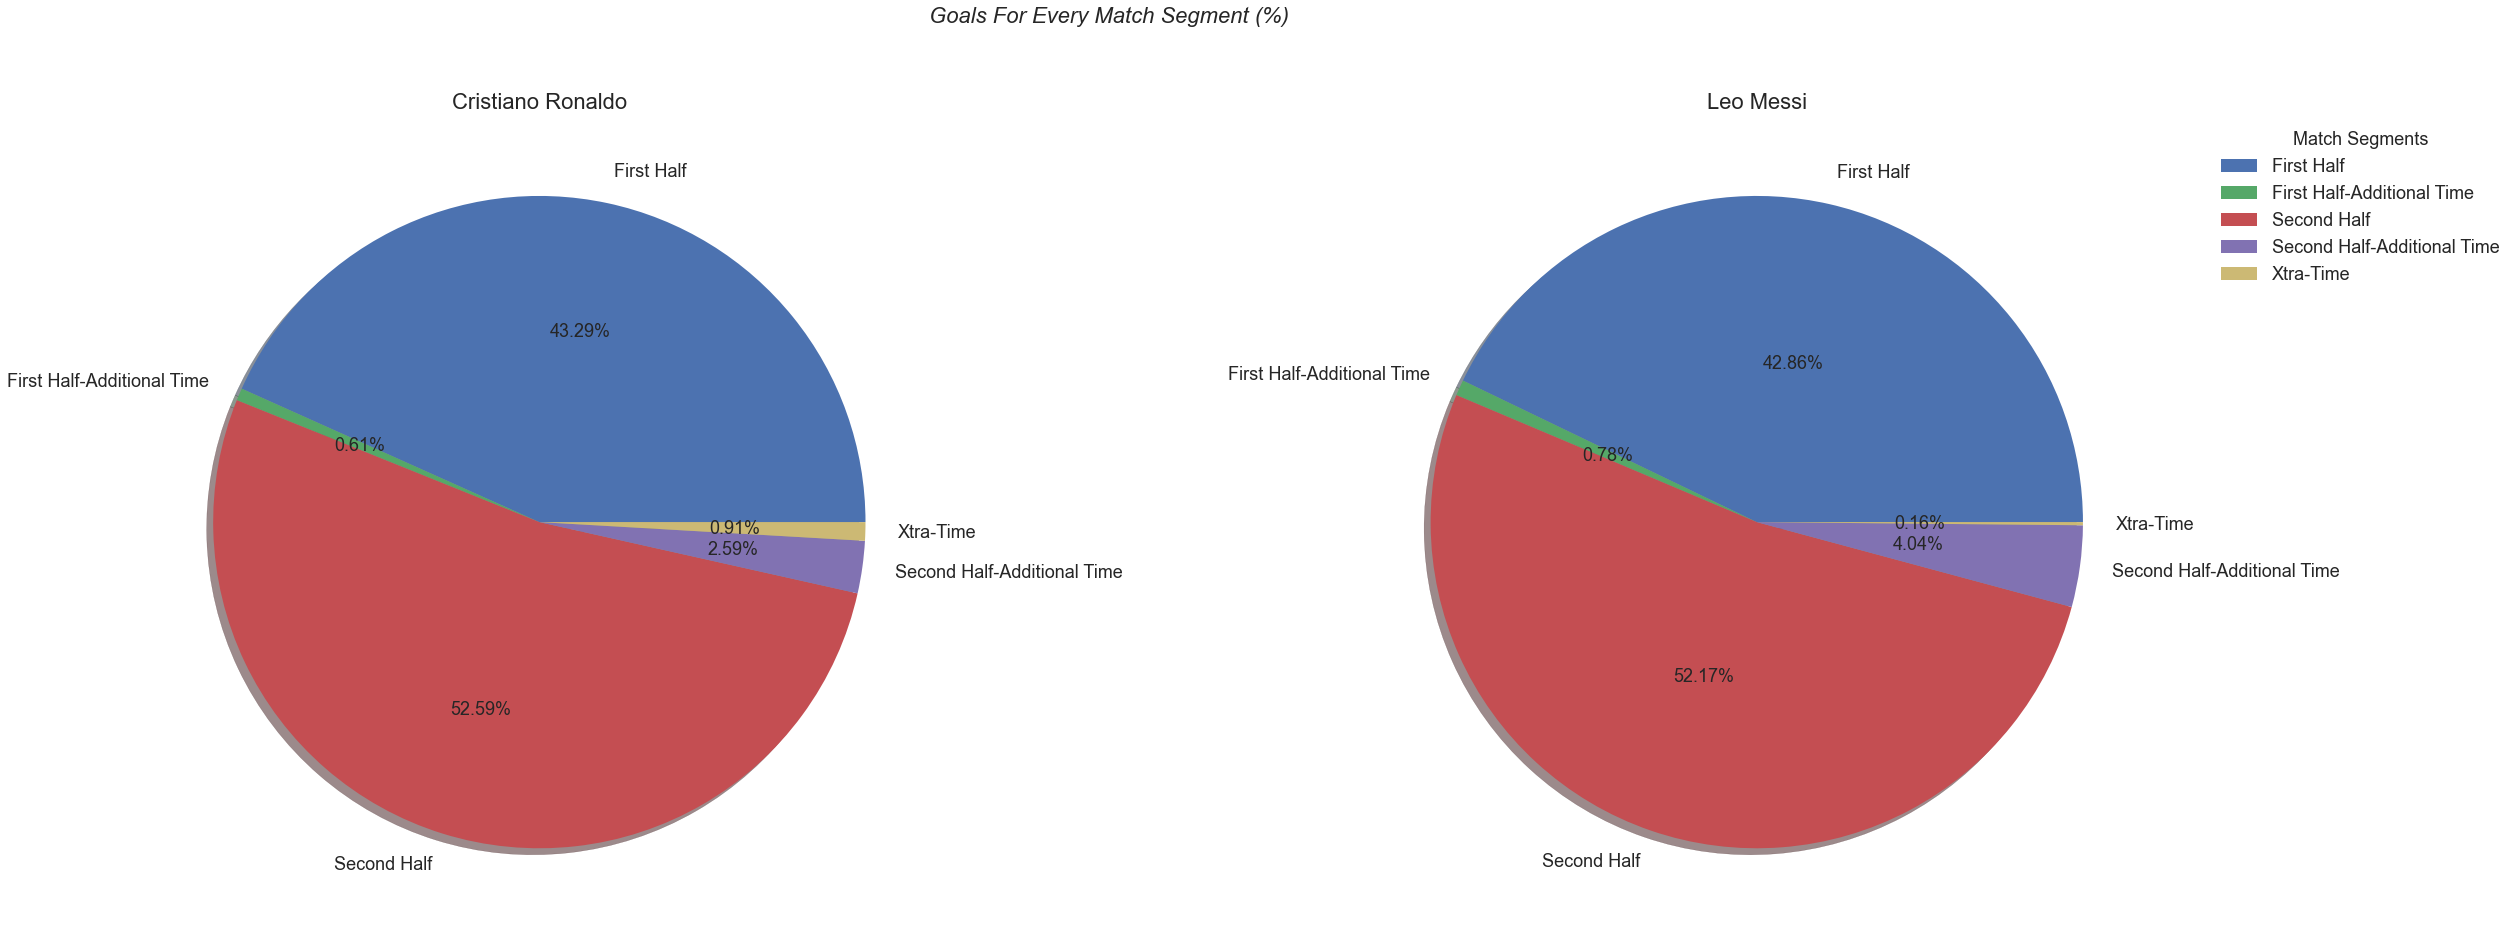

In [316]:
plt.subplot(1, 2, 1)
df_clean.loc[df_clean.player=='Ronaldo'].groupby(['match period'])['match period'].count().plot(kind='pie',shadow=True,autopct='%.2f%%',figsize=(40,15))
plt.ylabel(' ')
plt.title('Cristiano Ronaldo')
plt.subplot(1, 2, 2)
df_clean.loc[df_clean.player=='Messi'].groupby(['match period'])['match period'].count().plot(kind='pie',shadow=True,autopct='%.2f%%',figsize=(40,15),pctdistance=0.5)
plt.ylabel(' ')
plt.title('Leo Messi')
plt.legend(title='Match Segments',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.suptitle("Goals For Every Match Segment (%) ",style='oblique')
#plt.tight_layout()
plt.show()

> **Result**

* Ronaldo scored more goals than Messi in the first **(284 for Ronaldo and 276 for Messi)** and second **(345 for Ronaldo and 336 for Messi)** half time

* Messi scored more goals in extra time in the first and second half

* Ronaldo scored **the most goals** in the **90th minute** with **18 goals**

* in Extra Time: **Ronaldo** scored **6** goals , while **Messi** scored **one**

## <font color='red'>**Research Question 8: How many goals are scored for a single match in all competitions?**

> * **Biggest number of Goals scored in a single match for  `Cristiano Ronaldo`**

In [317]:
df_clean.loc[df_clean.player=='Ronaldo'].groupby(['opp','date','comp'])['date'].count().nlargest(20)

opp              date        comp            
Espanyol         2015-09-12  LaLiga              5
Granada CF       2015-04-05  LaLiga              5
Celta de Vigo    2016-03-05  LaLiga              4
Elche CF         2014-09-23  LaLiga              4
Girona           2018-03-18  LaLiga              4
Malmö FF         2015-12-08  Champions League    4
Racing           2010-10-23  LaLiga              4
Sevilla FC       2011-05-07  LaLiga              4
Ajax             2012-10-03  Champions League    3
Alavés           2016-10-29  LaLiga              3
Athletic         2010-11-20  LaLiga              3
                 2014-10-05  LaLiga              3
Atlético Madrid  2012-04-11  LaLiga              3
                 2016-11-19  LaLiga              3
                 2017-05-02  Champions League    3
                 2019-03-12  Champions League    3
Bayern Munich    2017-04-18  Champions League    3
CA Osasuna       2011-11-06  LaLiga              3
Cagliari Calcio  2020-01-06  Serie A

> *  **Biggest number of Goals scored in a single match for  `Leo Messi`**

In [318]:
df_clean.loc[df_clean.player=='Messi'].groupby(['opp','date','comp'])['date'].count().nlargest(40)

opp              date        comp            
Bay. Leverkusen  2012-03-07  Champions League    5
Arsenal          2010-04-06  Champions League    4
CA Osasuna       2013-01-27  LaLiga              4
Espanyol         2012-05-05  LaLiga              4
SD Eibar         2017-09-19  LaLiga              4
                 2020-02-22  LaLiga              4
Valencia         2012-02-19  LaLiga              4
APOEL Nicosia    2014-11-25  Champions League    3
Ajax             2013-09-18  Champions League    3
Atlético Madrid  2009-01-06  Copa del Rey        3
                 2011-02-05  LaLiga              3
                 2011-09-24  LaLiga              3
CA Osasuna       2011-09-17  LaLiga              3
                 2014-03-16  LaLiga              3
CD Leganés       2018-04-07  LaLiga              3
CD Tenerife      2010-01-10  LaLiga              3
Celta de Vigo    2019-11-09  LaLiga              3
Celtic           2016-09-13  Champions League    3
Dep. La Coruña   2012-10-20  LaLiga 

> * **Stats Visualization**

<function matplotlib.pyplot.show(close=None, block=None)>

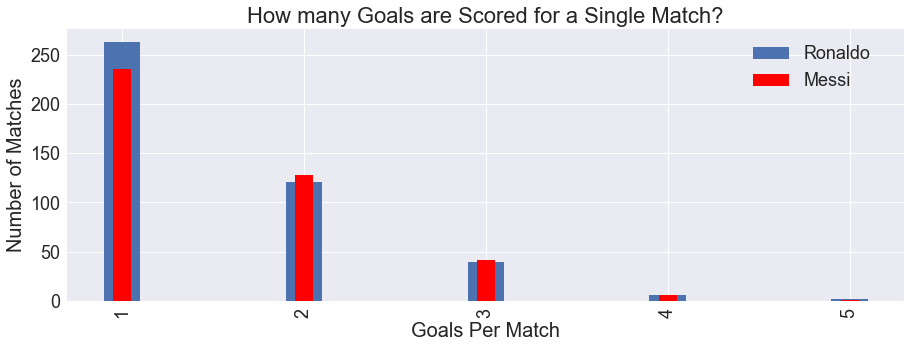

In [319]:
df_clean.loc[(df_clean.player=='Ronaldo')].groupby(['opp','date'])['date'].count().value_counts().plot(kind='bar',width = 0.2,label='Ronaldo')
df_clean.loc[(df_clean.player=='Messi')].groupby(['opp','date'])['date'].count().value_counts().plot(kind='bar',color = 'r',width = 0.1,label = 'Messi')
plt.xlabel('Goals Per Match')
plt.ylabel('Number of Matches')
plt.title('How many Goals are Scored for a Single Match?')
plt.legend(bbox_to_anchor=(0.8, 1), loc='upper left')
plt.show

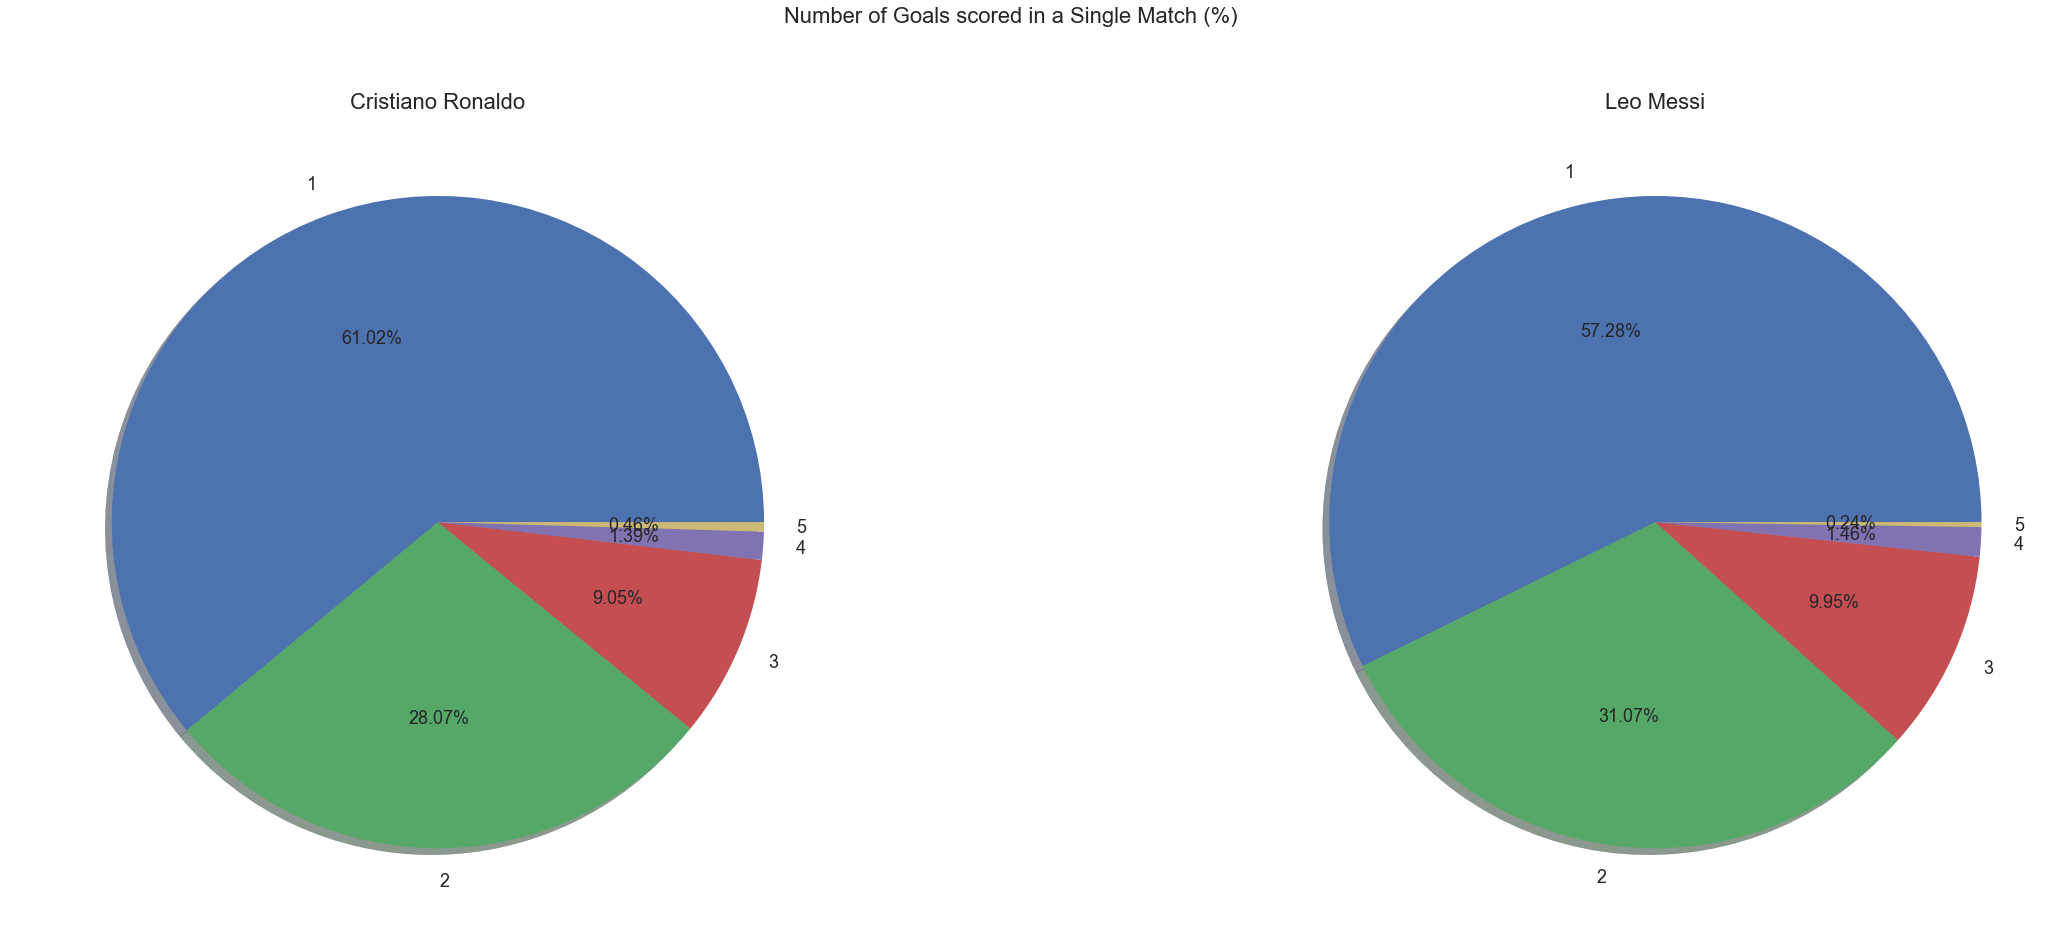

In [320]:
plt.subplot(1, 2, 1)
df_clean.loc[(df_clean.player=='Ronaldo')].groupby(['opp','date'])['date'].count().value_counts().plot(kind='pie',shadow=True,autopct='%.2f%%',figsize=(40,15))
plt.title('Cristiano Ronaldo')
plt.ylabel(' ')
plt.subplot(1, 2, 2)
df_clean.loc[(df_clean.player=='Messi')].groupby(['opp','date'])['date'].count().value_counts().plot(kind='pie',shadow=True,autopct='%.2f%%',figsize=(40,15))
plt.title('Leo Messi')
plt.ylabel(' ')
plt.suptitle('Number of Goals scored in a Single Match (%)')
plt.show()

> **Result**

* **Ronaldo** scored **5 goals** on two occasions in the same year **(against Espanyol and Granada in the La Liga season 2015)** , in return **Messi** did it only once **(against Bayern Leverkusen in UEFA Champions League 2012 season)** .

* Ronaldo and Messi are equal in their **Super Hat-trick (4 goals per match)** with **four times each**

* Messi outperformed Ronaldo in scoring two and three goals in one match, while Ronaldo scored only one goal in the match more times than Messi 

<center><img src="https://i.guim.co.uk/img/media/14b508174e9eebcee1da6046bd46b05a26d66590/0_48_4500_2699/master/4500.jpg?width=445&quality=45&auto=format&fit=max&dpr=2&s=91e0ff884c8a16bbdf59dc3c1da86ac7"/></center>

* Ronaldo scored a hat-trick against Atletico Madrid on four occasions (twice in the La Liga seasons 2012 and 2016 and twice in the Champions League seasons 2017 and 2019).

<center><img src="https://www.realmadrid.com/img/ultrapanoramica_1500px/_5am1473.jpg"/></center>

## <font color='red'> **Research Question 9: Who Scored more in Home Matches and Away Matches?**

> * **Home and Away Goals for every player**


In [321]:
df_clean.groupby(['player','venue'])['venue'].count()

player   venue
Messi    A        255
         H        389
Ronaldo  A        278
         H        378
Name: venue, dtype: int64

> * **What is the percentage of goals scored on home or away in a particular competition out of the total goals?**

In [322]:
df_clean.loc[df_clean.player == 'Ronaldo'].groupby(['venue','comp'])['venue'].count().nlargest(5)/656*100

venue  comp            
H      LaLiga              27.134146
A      LaLiga              20.274390
H      Champions League    11.128049
A      Champions League     9.298780
H      Premier League       8.689024
Name: venue, dtype: float64

In [323]:
df_clean.loc[df_clean.player == 'Messi'].groupby(['venue','comp'])['venue'].count().nlargest(5)/656*100

venue  comp            
H      LaLiga              40.396341
A      LaLiga              28.353659
H      Champions League    10.975610
A      Champions League     7.012195
H      Copa del Rey         5.640244
Name: venue, dtype: float64

> * **Stas Visualization**

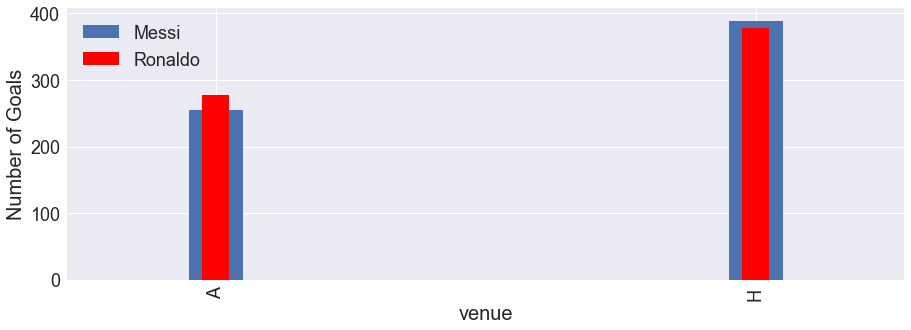

In [324]:
df_clean.loc[df_clean.player=='Messi'].groupby('venue')['venue'].count().plot(kind='bar',width = 0.1,label = 'Messi')
df_clean.loc[df_clean.player=='Ronaldo'].groupby('venue')['venue'].count().plot(kind='bar',color='r',width = 0.05,label = 'Ronaldo')
plt.legend()
plt.ylabel('Number of Goals')
plt.show()

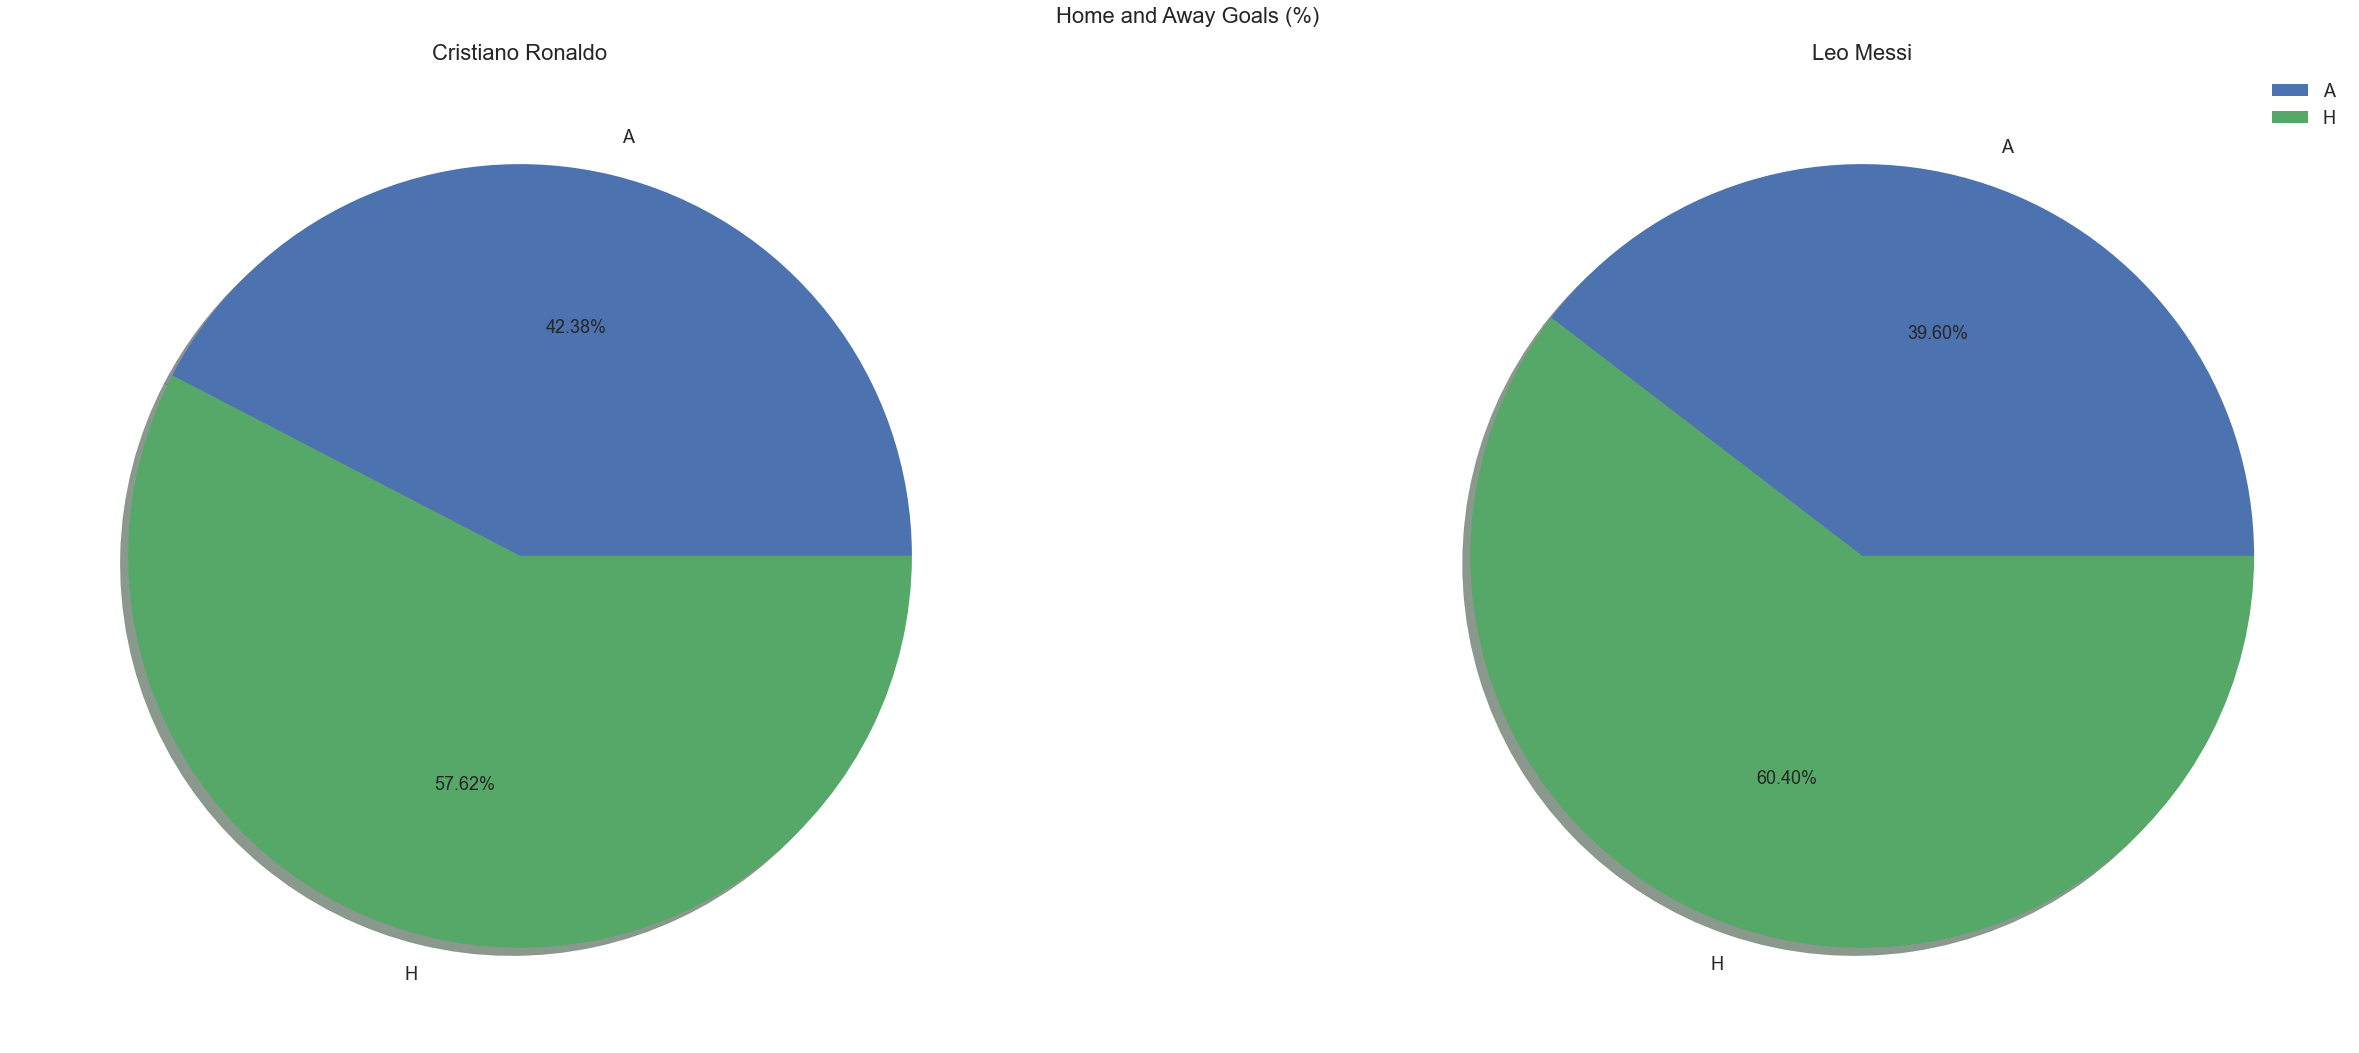

In [325]:
plt.subplot(1,2,1)
df_clean.loc[df_clean.player == 'Ronaldo'].groupby(['venue'])['venue'].count().plot(kind='pie',shadow=True,autopct='%.2f%%',figsize=(40,15))
plt.title('Cristiano Ronaldo')
plt.ylabel(' ')
plt.subplot(1,2,2)
df_clean.loc[df_clean.player == 'Messi'].groupby(['venue'])['venue'].count().plot(kind='pie',shadow=True,autopct='%.2f%%',figsize=(40,15))
plt.title('Leo Messi')
plt.ylabel(' ')
plt.legend()
plt.suptitle('Home and Away Goals (%) ')
plt.tight_layout()
plt.show()

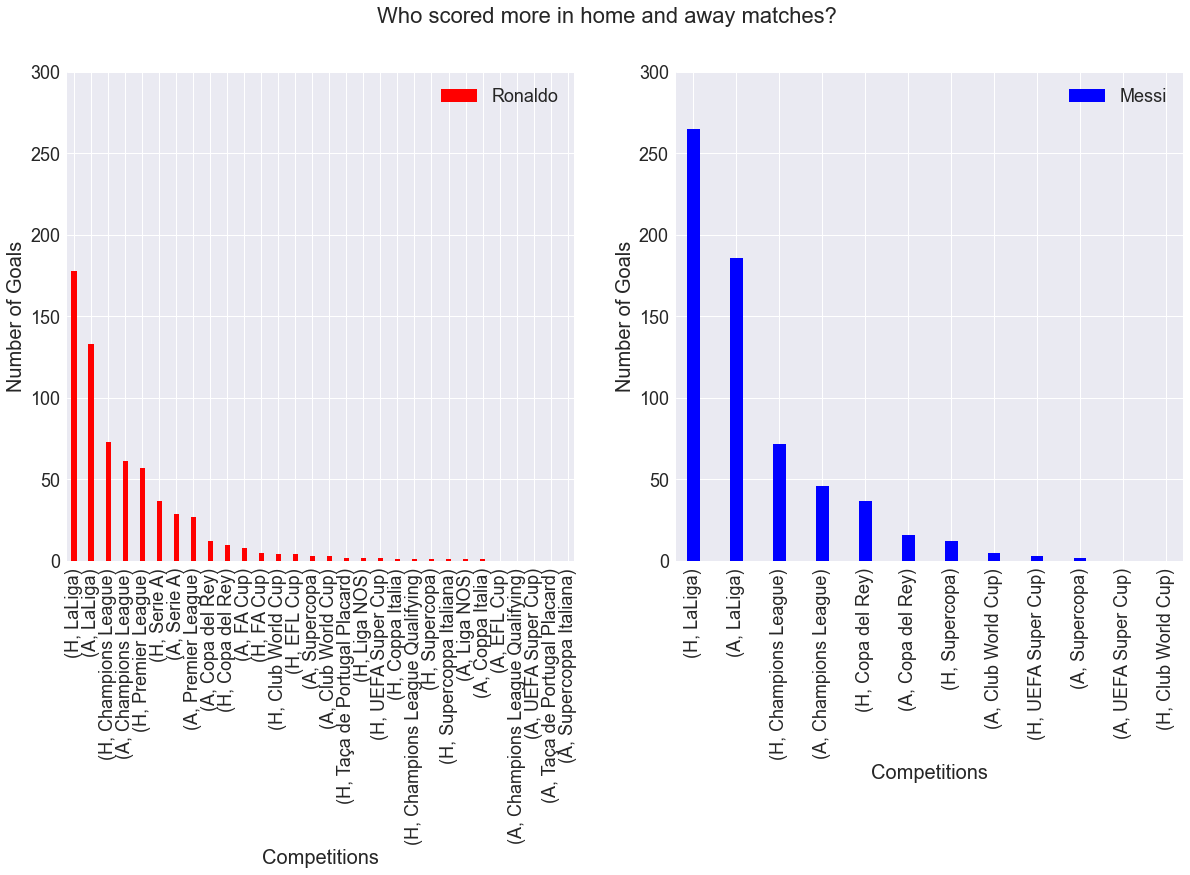

In [326]:
plt.subplot(1,2,1)
df_clean.loc[df_clean.player == 'Ronaldo'].groupby(['venue','comp'])['venue'].count().nlargest(35).plot(kind='bar',color='r',width = 0.3,label='Ronaldo',figsize=(20,9))
plt.ylabel('Number of Goals')
plt.xlabel('Competitions')
plt.ylim(0,300)
plt.legend()
plt.subplot(1,2,2)
df_clean.loc[df_clean.player == 'Messi'].groupby(['venue','comp'])['venue'].count().nlargest(35).plot(kind='bar',width = 0.3,label='Messi',color='b')
plt.ylim(0,300)
plt.suptitle('Who scored more in home and away matches?')
plt.ylabel('Number of Goals')
plt.xlabel('Competitions')
plt.legend()
plt.show()

> **Result**

* Messi scored more goals than Ronaldo at home matches, while Ronaldo scored more goals than Messi at away matches.

* Messi scored more than 40% of his goals at home in LaLiga.

* Ronaldo, in turn, scored more than 25% of his goals at home in LaLiga.

## <font color='red'> **Research Question 10: Who is the most player that made assists for each player?** 

> * **How many different players made assists for Ronaldo?**

In [327]:
df_clean[(df_clean.player=='Ronaldo') & (df_clean.assisted !='No Assist')]['assisted'].nunique()

72

> * **How many different players made assists for Messi?**

In [328]:
df_clean[(df_clean.player=='Messi') & (df_clean.assisted !='No Assist')]['assisted'].nunique()

60

> *  **Stats Visualization**

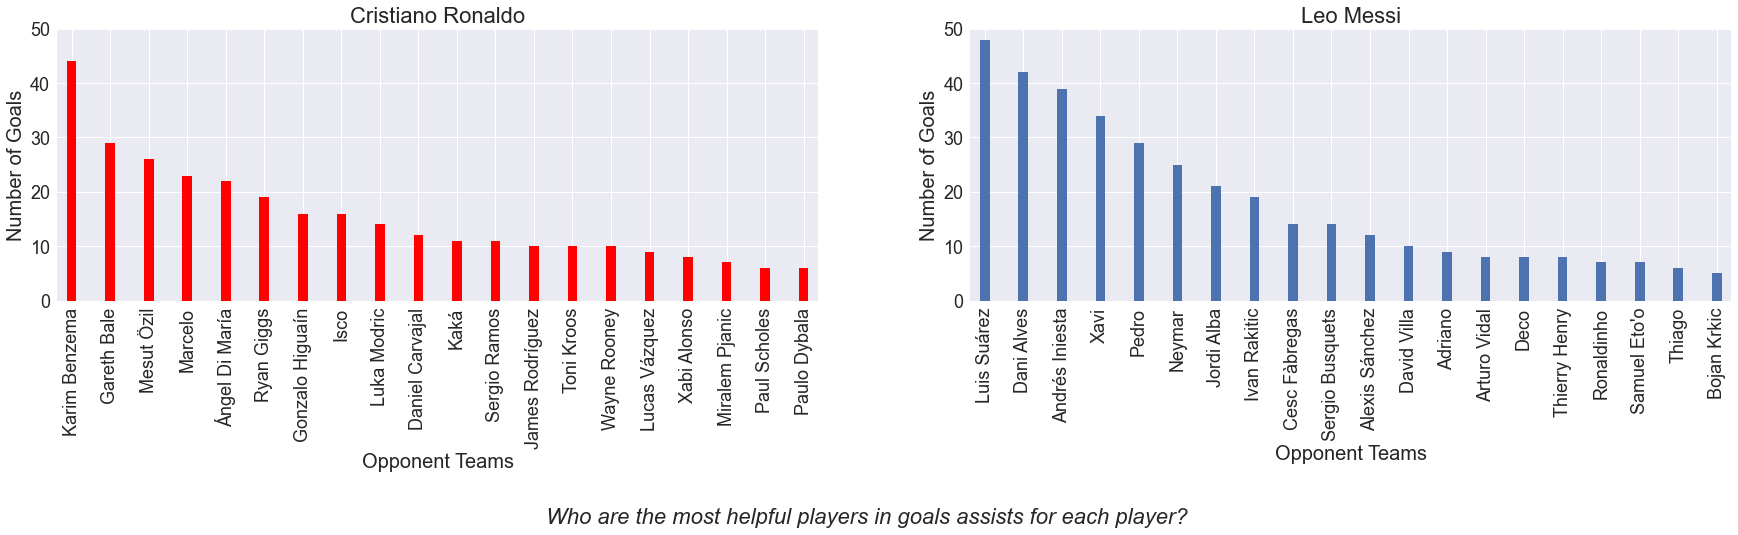

In [329]:
plt.subplot(1,2,1)
df_clean.loc[(df_clean.player=='Ronaldo') & (df_clean.assisted !='No Assist')].groupby(['assisted'])['opp'].count().nlargest(20).plot(kind='bar',figsize=(30,5),color='r',width=.25)
plt.title('Cristiano Ronaldo')
plt.xlabel('Opponent Teams')
plt.ylabel('Number of Goals')
plt.ylim(0,50)
plt.subplot(1,2,2)
df_clean.loc[(df_clean.player=='Messi') & (df_clean.assisted !='No Assist')].groupby(['assisted'])['opp'].count().nlargest(20).plot(kind='bar',width=0.25)
plt.title('Leo Messi')
plt.xlabel('Opponent Teams')
plt.ylabel('Number of Goals')
plt.ylim(0,50)
plt.suptitle('Who are the most helpful players in goals assists for each player?',style='italic',y=-.45)
plt.show()

> **Result**

* **Ronaldo's** best colleague was **" Karim Benzema "** , who contributed to **making 44 goals.**

<center><img src="https://as01.epimg.net/en/imagenes/2020/12/23/football/1608729823_084200_noticia_normal.jpg"/></center>

* **Messi's** best colleague is **" Luis Suarez "**, as he made **48 goals** for Leo.

<center><img src="https://www.fcbarcelona.com/fcbarcelona/photo/2018/06/07/c3108421-6926-41f9-a9e0-5568f5bfd6c0/MrXZPZNI.jpg"/></center>

* **72** different players contributed to making goals for **Ronaldo.**

* **60** different players contributed to **Messi's** goals.

# **Final Stage: Conclusion**

We can gather all this information and previous results in brief through the following lines:

*  **Ronaldo scored more goals than Messi** in general because he played in 4 different clubs in 4 different countries compared to Messi, who only played for Barcelona, ​​while if we delve into the discussion of the details of these numbers, we find that:

    *  Messi scored more than Ronaldo in local competitions such as LaLiga, Copa del Rey and Supercopa.
    *  Ronaldo has scored more goals than Messi in the UEFA Champions League.
    *  Ronaldo scored goals in all the leagues in which he played, starting with Liga NOS, then the Premier League, passing through the LaLiga, and then finishing in the  Serie A.
    *  Ronaldo has scored more goals against more teams than Messi.
    *  Ronaldo's best year at the top of his level equals only 75% of Messi's goals at the top of his level (79 goals in 2012 for Messi compared to 59 for Ronaldo in 2013)
    *  Ronaldo has many skills that allow him to score goals in different ways, such as shooting with both feet with an advantage to the right foot, scoring penalties, as well as headers and free kicks.
    *  Messi's favorite way to score goals is to shoot with the left foot, as he scored about 60% of his total goals (394 goals)
    *  Ronaldo's speed and powerful shots help him a lot in Solo goals, while Messi is famous for scoring goals in which he dribble a number of players before scoring the goal.
    *  Ronaldo as a LW scored 56% of his goals and Messi as a RW scored 50% of his goals. We notice half of the goals or a little more than half of both Ronaldo and Messi scored in positions that allow them to shoot with their strong feet.
    *  Ronaldo and Messi have scored the most goals in La Liga against the same team, " Sevilla F.C. " (25 goals for Ronaldo, 29 goals for Messi)
    *  The team that received the most goals from Ronaldo in the UEFA Champions League was " Juventus ", with 10 goals, and on the other hand, for Messi, it was " Arsenal " with 9 goals.
    *  Ronaldo scored more goals than Messi in the first (284 for Ronaldo and 276 for Messi) and second (345 for Ronaldo and 336 for Messi) half time.
    *  Messi scored more goals in extra time in the first and second half.
    *  Ronaldo scored the most goals in the 90th minute with 18 goals.
    *  Messi outperformed Ronaldo in scoring two and three goals in one match, while Ronaldo only scored one goal in the match more times than Messi.
    *  Ronaldo and Messi are equal in their Super Hat-trick (4 goals per match) with four times each.
    *  Messi scored more goals than Ronaldo at Home matches, while Ronaldo scored more goals than Messi at Away matches.
    *  Messi scored more than 40% of his goals at home in LaLiga.
    * Ronaldo's best colleague was "  Karim Benzema  ", who contributed to **making 44 goals.
    * Messi's best colleague is "  Luis Suarez  ", as he made 48 goals for Leo.

<center><img src="https://e00-ar-marca.uecdn.es/claro/assets/multimedia/imagenes/2020/12/08/16074592792926.jpg"/></center>